In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

In [2]:
df=pd.read_csv(r'C:\Users\user\Desktop\movies.csv')

In [3]:
#let's look at the data
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [4]:
#let's see if there is any missing data

for col in df.columns:
    percent_missing=np.mean(df[col].isnull())
    print('{}-{}%'.format(col,percent_missing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [5]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
df=df.fillna(0)

In [7]:
df['budget']=df['budget'].astype('int64')

In [8]:
df['gross']=df['gross'].astype('int64')

In [9]:
df['yearcorrect']=df['released'].astype(str).str[:4]

In [10]:
df.sort_values(by=['gross'],inplace=True,ascending=False)

In [11]:
pd.set_option('display.max_rows',None)

In [41]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       6      0  2009       697    7.8  1100000.0      1155    1779   
7445   535       6      0  2019       184    8.4   903000.0       162     744   
3045  6896       6      6  1997       705    7.8  1100000.0      1155    1779   
6663  5144       6      0  2015       699    7.8   876000.0      1125    2551   
7244   536       6      0  2018       193    8.4   897000.0       162     744   

      star  country     budget       gross  company  runtime  yearcorrect  
5445  2335       56  237000000  2847246203     2254    162.0           11  
7445  2242       56  356000000  2797501328     1607    181.0            9  
3045  1596       56  200000000  2201647264     2254    194.0           11  
6663   525       56  245000000  2069521700     1541    138.0           11  
7244  2242       56  321000000  2048359754     1607    149.0            9

In [13]:
df.drop_duplicates()

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
5652       Harry Potter and the Deathly Hallows: Part 1      PG-13  Adventure   
6

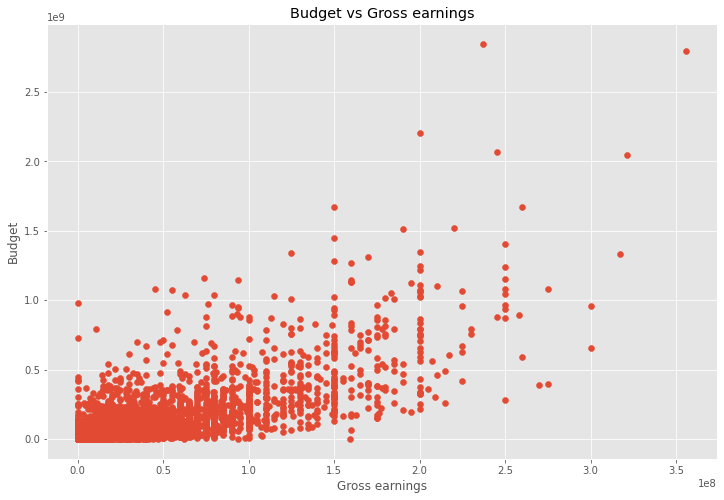

In [16]:
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross earnings')
plt.xlabel('Gross earnings')
plt.ylabel('Budget')
plt.show()


In [15]:
df=df.sort_values(by=df['gross'],inplace=False,ascending=False)

KeyError: 5445    2847246203
7445    2797501328
3045    2201647264
6663    2069521700
7244    2048359754
7480    1670727580
6653    1670516444
6043    1518815515
6646    1515341399
7494    1450026933
6644    1402809540
7247    1347597973
5845    1342321665
7075    1332698830
7271    1310466296
6262    1281508100
7072    1264434525
7281    1244639527
7055    1236005118
6244    1214811252
6688    1159444662
6846    1153337496
7250    1148485886
4245    1146030912
7458    1131927996
7456    1128462972
5878    1123794079
6059    1108569499
6494    1104054072
2448    1083720877
6047    1081142612
7463    1078232589
7450    1074427370
7488    1073394593
5685    1066970811
4852    1066179747
6869    1056057720
7481    1050693953
5860    1045713802
7140    1034800131
2245    1033928303
6908    1028570942
3451    1027082707
5667    1025468216
6863    1024121104
6045    1017003568
3843    1006968171
5243    1005973645
5652     977043483
6311     970766005
6905     966554929
7051     962542945
6455     962182865
5060     960996492
6253     959007513
4048     947495095
5051     942172396
4259     940352645
5451     934454096
4476     928760770
7246     911902649
3845     897690072
4643     896678241
5057     894983373
5539     886686817
6665     880681519
7047     880166924
4047     879602366
6143     877244782
6948     875458631
6870     873637528
4658     868390560
6274     865011746
7049     863756051
6657     858848019
7254     856085151
7043     853983911
5643     836836967
5468     836303693
6055     829747654
4043     825025036
7062     822824522
2844     817400891
6877     814044001
5097     813367380
7058     807817888
7467     800059707
4448     797361618
7068     794881442
209      792910554
7253     791657398
5453     791217826
5253     790653942
4459     788976453
6250     788680968
7245     786470484
6848     782836791
6443     773350147
4858     760006945
7455     759056935
6479     758411779
6061     757930663
6483     755356711
5726     752600867
6123     746921274
6844     746846894
6463     746045700
4653     745013115
6267     743559645
4256     741847937
5461     735099102
7573     726264074
6251     723192705
6448     714421503
5881     712205856
5470     711025481
6507     710644566
5050     709709780
6478     708982323
7046     701796444
6444     701729206
7565     699992512
5672     698491347
5873     694713380
6046     694394724
6678     682716636
2445     678226133
6849     677796076
3453     672806292
6254     668045518
4958     667094506
5863     665692281
6673     658344137
7066     657926987
6477     657869686
7296     654855901
4244     654264015
4058     653779970
6247     644783140
6854     644411850
6859     634208384
5247     631746197
4455     631607053
6655     630162448
5285     629443428
5848     626137675
6101     624026776
5644     623933331
5053     623726085
7257     622674139
6515     621537519
7061     619179950
3064     618638999
4850     616502912
4480     612054506
5251     611257819
6098     609016565
7087     605425157
5327     603900354
4655     603873119
5658     592462816
5250     589580482
3057     589390539
6283     587205319
5932     586764305
5245     585796247
5061     585410052
7251     582893671
3848     579707738
4864     574481229
6649     569651467
7071     566652812
5949     563749323
4659     562363449
5883     559852396
5976     554987477
3248     553709788
4469     552639571
6070     549368315
6475     547426372
3664     546388108
6856     543934105
5891     543848418
5668     543113985
6662     542358331
4671     542063846
6277     540455876
6075     538983207
2        538375067
5128     536414293
6654     532950503
7276     530259473
7316     529323962
7309     528583774
7060     527965936
7057     527016307
7509     525683457
6472     524976069
5458     524028679
4500     522657936
5260     521311890
6872     521170825
1843     520881154
6648     519311965
7410     512492755
1648     505703557
2056     504050219
6519     498781117
4449     497409852
3470     497375381
5662     494879471
2853     494471524
6295     493311825
5674     493214993
7512     491730089
7107     490719763
3854     487853320
4664     487287646
5488     485930816
6504     485004754
4296     484592874
5889     483866518
3244     482349603
5897     481800873
1647     476684675
333      475106177
4651     474968763
6734     474800000
1443     474171806
6690     473990832
7461     473093228
6092     471222889
5450     469310836
6482     468060692
7307     467989645
6273     467365246
3443     466364845
3645     465380802
1646     463406268
4847     461991867
7652     461421559
4876     460435291
5121     459242249
6458     458863600
2850     457696391
4848     456068181
4275     454627263
3853     450717150
7634     450064993
5844     449326618
3858     449220945
6860     448906865
3472     448191819
4075     445135288
5080     444100035
3857     443280904
5588     443140005
6062     441809770
2255     441286195
6661     440603537
6847     439048914
7050     438006904
7267     436188866
7510     433921300
4265     433371112
4087     431971116
7514     430051293
3650     429632142
7324     428028233
5688     427374317
4268     427344325
5853     426588510
7648     426505244
6044     426074373
1855     424967620
1649     424208848
5291     419665568
5265     418765519
7623     417282021
3447     415933406
5727     415686217
6892     415484914
6309     414828246
6451     414351546
5505     413106170
1445     411508343
2052     411006740
6282     411002906
7073     410902662
7113     409231607
6944     408754975
5244     408430415
4056     408247917
4278     407711549
7468     404980543
5284     403449830
6051     403354469
5682     400063852
4865     398479497
6064     396592829
7268     395618157
2654     394436586
7261     392924807
6243     392000694
4870     391081192
1853     390493908
92       389925971
6874     389681935
5058     388156011
7483     386600138
6685     386041607
5444     385680446
7462     384623579
4918     384336108
7110     383930656
4072     383257136
645      381906762
7085     381545846
5493     381509870
3273     379014294
2447     378882411
5266     378410542
6131     376152455
6279     375740705
6643     375658750
7252     375540831
4504     374583879
7444     374565754
3699     374111707
5920     373993951
4647     373661946
6530     373515621
5462     373062864
5104     372234864
7279     371987838
4688     371594210
5474     371353001
5843     370569774
6446     370541256
3258     369884651
6447     369330363
2256     368875760
3881     368780809
4080     368744044
2656     366101666
7460     365971656
7285     365551694
5118     365352546
3457     363889678
7643     363656624
3697     363597184
3260     363258859
6485     363204635
4496     362744280
3872     362211740
6365     362000072
3476     361832400
5448     360366870
6516     359200044
5695     359126022
2079     358994850
6082     358375603
4062     358372926
6871     358180115
843      357288178
6896     356700357
3450     356296601
3849     355475245
2647     355237933
1247     354825435
6263     353642274
7533     353284621
4461     353133898
2044     352927224
7080     352794081
5866     352616690
6964     352333929
2670     352194034
4051     352114312
6269     351723989
3867     351692268
2449     351583407
7311     351496066
2450     350448145
7243     350320413
3696     349822765
7305     349546142
3257     349464664
6114     348840316
6457     348319861
6399     347545360
4490     347512318
3904     347325802
6932     346864886
7112     346118277
2683     346079773
6858     343471816
6001     342695435
5256     342463063
2459     341631208
5066     340487836
4901     339795890
6474     337580051
2652     336567158
5701     336365676
5255     335802786
6102     335260290
2858     335062621
6936     334933831
6903     334897606
4661     333535934
481      333107271
3085     333011068
1451     332500002
6707     332207671
6506     331333876
3678     330444045
1254     329803958
5650     329398046
3652     328718434
847      328203506
2645     327333559
7453     327281779
4849     326706115
6548     326479141
2875     325338851
5614     325286646
6751     325186032
2247     322161245
5692     321885765
6861     321788219
7255     321752656
2091     321731527
5514     321682600
5655     321669741
5443     321457747
2855     320689294
6245     320290989
1057     320145693
7649     319715683
5661     319713881
5481     317375031
3856     316791257
485      316360478
3059     315156409
6107     314975955
4741     314432837
4536     314215454
3068     314178011
6702     312296056
6879     312242626
3454     312016928
7119     311950384
7454     311539397
5087     311312624
5735     310650585
5288     309979994
2912     309492681
3526     309460292
5460     309208309
6486     307166834
4859     307127625
6118     306941670
4077     306776732
7105     306515884
7065     306209289
7381     304868961
6307     304654182
3262     304320254
6917     303723636
6862     303144152
6080     303025485
3074     302710615
5449     302469017
6112     301970083
5103     301913131
1846     300854823
663      300473716
650      300400432
5713     300228084
4454     300157638
3463     300135367
1074     299965036
6942     299820798
3083     299288605
5887     299268508
5339     298572799
7273     297718711
6695     297002527
1487     296999813
4063     296938801
6876     296482446
3654     296339528
477      296187079
7115     296069199
5645     294805697
3340     294456605
5094     293514336
5709     293503354
5598     292817898
4843     291465373
3673     291420351
7351     290930148
4478     290835269
5665     290745055
3274     289317794
6453     288885818
1253     288752301
4654     288467645
5847     288383523
7321     288175335
2678     287928194
3901     287553595
6689     287144079
3449     286801374
6270     286168572
6287     286140700
3299     285444603
6079     284139100
6338     282570682
6524     282377683
3895     281995610
5671     278780441
6850     278454417
3651     278019771
4083     277448382
6090     276144750
6603     275698039
4060     275650703
6074     275293450
3900     274703340
7318     274650803
5680     274470394
6377     274325949
2887     273961019
2857     273552592
4292     273339556
4076     273144151
1845     272742922
5647     271457301
6496     270665134
2261     270248367
6260     269994119
5269     269958228
5344     269784201
5056     269755430
6380     268426634
6521     268175631
5473     267045765
2054     266892996
2276     266614059
4305     265328738
4571     265126918
5246     264770996
2665     264218220
3247     264118201
3659     264105545
3046     263920180
2649     262821940
4896     262552893
4691     262511490
5677     261989769
1645     261317921
7472     261119292
6336     260502115
5874     260095986
7048     259334548
4300     259175788
7452     258908054
5105     258097122
3089     257938649
6488     257579282
4466     256697520
3657     256271286
5318     255743093
7280     255614941
7056     255589157
7469     255184580
2268     255000211
7191     254158390
2693     254134910
7492     253890701
5131     253625427
5361     252909177
3062     252712101
7493     252442974
5670     252276927
3133     251212670
6264     251171807
3284     250849789
3266     250821495
4911     250425512
4308     250397798
3269     250288523
4055     249348933
3459     248639099
3658     248118121
2453     247275374
7477     246999039
6249     246984278
6806     246233113
5884     245724603
2458     245700832
3067     245676146
6953     245623848
6078     245527149
7650     245487753
4260     245285165
4248     245203167
7611     245179562
1666     245077583
6725     244874809
6469     244819862
3255     244721064
5286     244232688
6348     243611982
2050     243240178
5510     243006126
4045     242875078
6728     242786137
6505     242688965
2877     242295562
7063     240891763
6922     240797623
6952     240697856
4878     240685326
7655     240663149
6100     240159255
1651     240031274
1251     239606210
6376     239258712
7256     238539198
3060     238235719
7473     237860050
5755     237382724
3676     237202299
6063     236412453
4250     236350661
6883     236225193
4462     236214446
3862     235926552
1448     235860116
6676     235666219
3448     235483004
6095     234989584
3480     234801895
6809     234798636
6461     233555708
5325     233093859
4319     232722935
5851     232617430
5063     232372681
6054     232325503
5135     232225908
2863     231976425
2057     231605150
7503     231252591
4657     230884728
5313     230685453
2843     230418342
3055     230098753
6343     229930771
6888     229147509
5072     228738393
7148     227978645
2267     227927165
1468     227853986
5941     227817248
681      227514205
7059     226945087
5865     226904017
5254     226837760
5673     226497209
6288     226349749
7093     225973340
3049     225933435
7464     225508210
5309     225132113
5654     224920375
3667     224834564
3052     224012234
4298     223853736
2457     223664608
4696     223387299
5304     223241637
6525     222809600
1453     222724172
3479     222104681
7108     221600160
1670     221303188
4288     220673217
4457     220239925
6902     220021259
5069     219922417
5855     219851172
5348     219375562
5530     219103655
4453     219100084
6289     218791811
3278     218613188
6056     218340595
4656     218122627
7145     217776646
6538     217124280
6894     216972543
4464     216763646
5857     216639112
1260     216614388
7447     216601214
5748     216485654
5868     216197492
2464     215887717
6723     215863606
2048     215862692
3717     215663859
1463     215394738
3656     215294342
5737     215283742
5852     214945591
6491     214657577
1048     214577242
7323     214215889
5478     214104620
7401     214040103
4057     214034224
2476     214015089
2444     213928762
4458     213719942
3675     213525736
2646     213216216
6480     212902372
5343     212874864
3682     212742720
3519     212404396
2713     212385533
3487     211989043
6914     211952420
6462     211822697
5940     211819354
5303     211787511
5719     211780824
4270     211622535
4486     211468235
1449     211343479
5459     210888950
3873     209947037
5888     209838559
4064     209196298
6692     209035668
6851     208314186
6087     208076205
4274     207725639
3670     207515725
3844     207305509
2265     206678440
3468     206071502
4879     205850134
6928     205754447
4937     205668210
1857     205405498
6291     205366737
7163     205035819
5308     204826668
4731     204681899
5696     204594016
5315     204313400
7506     203783566
4495     203567857
5068     203553311
5829     203509374
6674     203427584
3870     203388341
6855     203388186
6518     203277636
4563     203172417
3294     202292902
1655     201965915
1653     201957688
7645     201858461
6696     201634991
6069     201585328
5294     201545517
4952     200811689
3969     200687492
1657     200512643
6316     199850315
4131     199043471
5659     199006387
3311     198685114
4685     198636868
4472     198520934
6093     198467168
6053     198087212
7370     197744377
6378     197687603
7197     197183546
4325     197101678
4073     197079546
6499     196710396
2451     196567262
5083     196393745
6130     196114570
4303     195745823
5248     195702963
7069     195333312
2260     195268056
6961     195243411
7484     195179299
6672     194564672
4750     194137091
5975     193967670
4044     193921372
4065     193772504
7525     193457467
5114     193355800
6456     192330738
7528     192306508
1850     191502426
4674     191466556
2507     190539357
4285     190538630
7287     190400157
3680     190213455
2672     189859560
3329     189176423
1272     189015611
6281     188133322
6278     187733202
2643     187436818
6017     187361754
4532     187281115
5151     187134117
3292     186883563
4680     186797986
4407     186303759
5532     186167139
3875     186053725
4867     186003591
3280     185991646
5904     185770310
7095     185400345
5447     185382813
2871     185260553
3869     184935320
6026     183954145
6938     183936074
6686     183887723
5485     183658498
3722     183611771
6986     183388953
5562     183348429
2068     183097323
2469     183031272
6146     183018522
3283     182968902
1848     182291969
4340     182290266
2690     182057016
2698     182016617
4928     181674817
2892     181489203
4512     181216833
1874     181096164
4049     181001478
4243     180906076
4085     180630907
4067     180622424
7161     180613824
6865     180563636
4888     180557550
7130     180419231
7545     180314199
2685     179519401
6105     179379533
4290     179265204
6933     179246868
4269     179179718
1863     179033791
5452     178866158
5279     178767383
4509     178311729
4929     178281554
4906     178262620
3063     178127760
4649     178062759
2083     178051587
3125     177977226
7052     177856751
3482     177841558
5912     177584879
5801     177512032
4289     177502387
4499     177427090
4102     177395557
4644     177378645
6349     177313795
3502     177311151
5919     177243185
5698     177238796
221      177200000
2277     176997168
3539     176885658
7045     176600207
6066     176506819
7544     176345966
3999     176104344
4264     176070171
5111     175372502
1867     174999005
5879     174822325
7298     174804407
3076     174463257
5146     174440724
3860     173997108
6271     173965010
7395     173961069
3735     173959438
5869     173930596
6301     173649931
6681     173567581
7474     173469516
6885     173185859
2846     173046663
4284     173013509
3855     172989651
6449     172945750
4196     172855065
5277     172394180
3066     172363301
5495     171844840
3314     171757863
4862     171720398
5044     171627166
7064     171547802
1263     171504781
4114     171269535
3056     171120329
5049     170812526
5681     170458922
2508     170362582
6293     170270201
4503     170268750
4554     170128460
4163     169956806
5931     169852759
7089     169846945
6513     169837010
3065     169785704
5262     169748929
3674     169661687
5109     169333034
2659     168839459
4445     168423227
5316     168319243
7374     167885588
6677     167882881
5694     167805466
1085     167780960
6081     167739961
4491     167298192
5469     166842739
7644     166534027
3756     166339890
2847     165615285
6693     165478348
3868     165335153
5948     165184237
6864     164989338
4917     164874275
3297     164839294
4393     164729679
3464     164648142
3086     164508066
4335     164433867
5322     164170327
4940     164115897
5375     164112721
4744     163995949
4916     163794509
5257     163728902
3353     163644662
5275     163403799
4845     163362095
4924     163247198
4665     162949164
4679     162944923
1658     162738726
5295     162655351
6845     162360636
4645     162242962
3446     162242684
6913     162146076
6344     161919318
5876     161849455
3685     161834276
6068     161772375
3508     161626121
6529     161502194
6481     161459297
3072     161376069
1465     161001698
4299     160846332
2454     160638883
7259     160542134
4314     160466000
7074     160192267
1482     160188546
6085     160112671
4322     160099222
5960     160078586
2058     159814498
5081     159814490
5282     159808370
3279     159710793
3102     159330280
5759     159291809
2909     159212469
6031     159197038
2049     159157447
7380     158972499
4844     158964610
6684     158762963
4650     158733820
6740     158261424
1672     157920733
5922     157887643
6852     157830487
7485     157563598
2686     157387195
5675     157107755
6803     157029618
5119     156835339
6511     156706638
4247     156595191
2063     156563139
6072     156491279
6647     156480177
1472     156167015
4910     155929020
7448     155712077
5586     155545279
4742     155457327
4912     155430335
6889     155160045
4096     155010032
4094     154906693
2289     154856263
6294     154802912
5721     154711438
4488     154649125
6551     154468902
4451     154118820
5651     154026136
2284     153698625
490      153633143
1699     153518974
5070     153383627
7451     153193369
3051     152944660
5894     152930623
3688     152699976
1860     152368585
2859     152266007
5732     152263880
5352     152039882
2938     152036382
2651     152022101
5089     152005713
1246     151927281
6403     151826547
6312     151783839
5849     151653750
7266     151572634
3496     151493655
5332     150988382
7044     150847274
6899     150680864
2901     150270147
5529     150166126
5923     149878437
3514     149705852
5930     149673788
5864     149542245
5754     149411550
5414     149292488
3691     149270999
5859     149228077
2059     149022650
4953     148963822
6910     148868835
7081     148675066
4318     148336445
6351     148075565
3891     147934180
5124     147880543
3915     147845033
7519     147792047
4694     147748505
5090     147717833
2845     147554998
5886     147332697
2073     147214049
3884     147080413
6636     146965787
6704     146936910
7491     146661977
6305     146428180
2879     146027888
5140     145896422
1499     145793296
5088     145710347
7124     145418070
4602     145358062
4717     145166804
5858     145051197
4749     144146816
3661     144056873
6982     143695338
5042     143325970
7646     143151000
3899     143049560
3254     142940100
6204     142802657
4720     142400065
7134     142337240
5996     142044638
7647     141950608
4922     141861243
3846     141774679
1243     141603197
4351     141591324
5022     141522961
2667     141407024
4294     141337989
3852     141220678
3879     141069860
4511     141067127
2941     141047179
3380     140894675
6909     140853810
3105     140807547
6691     140795793
6884     140705322
7149     140552359
6150     140470746
2384     140081992
5792     140073390
3077     139804348
5126     139352633
5565     138805831
1713     138697012
852      138545632
2764     138510230
3971     138307673
6556     138224951
2060     137783840
5075     137587063
5045     137515140
6308     137328301
2262     137298489
7282     137056262
3099     136982834
3084     136885767
1644     136861392
6471     136853506
5934     136836272
3663     136771683
6369     136533257
5867     136515867
5770     136333522
5484     136316880
3289     136159423
5877     135710029
6531     135503748
4914     135330182
2304     135130999
4883     135039924
7106     134866593
5764     134748021
4519     134734481
2664     134582776
6400     134409025
3528     134403112
1497     134212055
2053     134095253
4307     133960541
3592     133949270
2297     133752825
6711     133718711
6652     133440870
5953     133432856
7497     133031473
5098     132963417
6057     132820716
7361     132675864
5939     132563930
4652     132511035
2051     132440069
5892     132274484
4498     131977904
6340     131940411
5400     131856927
3905     131706809
7367     131523093
3092     131457682
4772     131426169
3252     131183530
4261     131095990
844      131060248
2127     131052444
5054     131016624
2501     131002597
4682     130982129
4473     130834852
4991     130628903
7220     130560428
4099     130549455
6058     130482868
5096     130290885
4945     130224158
4721     130154568
4447     130126277
2929     129832389
211      129795554
5356     129710514
5544     129540522
4481     129342769
5689     129190869
6127     128955898
3655     128884132
3445     128799509
5301     128792411
5095     128453183
6724     128388320
5249     128108211
3270     128038368
4149     128027976
6468     127994610
2104     127956187
5480     127944208
5905     127869379
3692     127666415
2715     127600435
7496     127461872
4755     127369981
5704     127233108
6109     126636097
1467     126297830
3054     126216940
6498     126069509
6284     126041322
7103     125856180
6967     125729635
3071     125586134
6300     125544024
7086     125479266
7222     125427681
210      125212904
225      125052686
4301     124914842
3075     124909762
3701     124745083
7030     124608438
5475     124596837
3488     124305181
4525     123971376
1069     123922370
4088     123729176
6490     123726688
4913     123384128
3253     123306987
4707     123276807
4255     123218424
7515     123133739
7174     123081555
6215     123054041
3117     122823468
7489     122810399
6841     122606884
4095     122563539
5553     122444772
5512     122426792
3120     122417389
2657     122195920
6246     122126687
4266     121975011
2896     121969216
6920     121790373
4646     121616555
3050     121214377
6797     121126188
4313     120801243
4854     120673227
7270     120556201
4985     120455994
1053     120207127
5896     120081841
4046     120072577
4955     119974972
1675     119946358
7289     119942387
7581     119932733
6199     119772232
3660     119754278
4144     119723358
2927     119718203
7476     119682635
7560     119559110
6912     119520023
5113     119483446
1856     119418501
116      119285432
4709     119240351
2480     119208989
4071     119137784
6882     119100758
4902     118890272
3535     118880016
4253     118686937
6887     118587880
2317     118243066
5047     118114220
6971     118102725
4710     118090836
2475     118071125
3087     118063304
6363     117867984
6549     117831631
4452     117815157
6731     117813057
3533     117758500
7290     117679066
2496     117615211
4560     117592831
3865     117487473
2258     117270765
5202     117252578
4336     117248958
5954     117094902
6315     116980662
4982     116755080
3324     116672912
4529     116650613
4295     116632628
6091     116471580
2293     116300000
2650     116112375
5305     115900897
4492     115900534
6015     115890699
7432     115757940
5712     115695182
4489     115505027
5552     115375850
4081     115374915
6048     115350426
2895     115267375
6        115229890
4207     115121981
859      115103979
2691     115101622
4194     115035090
5750     114984666
4950     114830111
6997     114501299
6219     114281051
3912     114252154
4894     114197742
6520     114178613
3555     113996937
3653     113916474
5336     113864059
4074     113758770
2701     113493481
5278     113398237
2671     113374103
2878     113309743
5273     113244290
7094     113231078
7521     113118226
4446     113100873
6739     112983889
3669     112880294
3282     112587658
5757     112462508
6915     112343513
2502     112006296
6465     111928365
6712     111711453
4877     111476513
97       111289673
5319     111231041
7651     111105497
4678     111069515
7498     111037232
1076     110996879
3702     110983407
1505     110879513
5020     110768122
2736     110627965
3116     110463140
3745     110317580
6906     110216998
5850     110206216
4079     110041363
4773     110013167
6931     109906372
863      109713132
4501     109706931
4846     109676311
3043     109423648
7242     109383972
3689     109283018
5359     108979549
5271     108902486
4107     108846072
6006     108609310
4983     108605609
4706     108539911
2485     108431355
354      108423749
5545     108394089
8        108185706
4570     108040622
6977     108007109
2707     107879496
3506     107752036
6527     107645357
3727     107626125
6838     107588225
4702     107516369
4273     107363905
6680     107228221
2460     107217396
2325     107198790
6167     107139399
6660     107045109
5783     106956330
2519     106683817
5347     106407672
5546     106387141
3687     106371651
2710     106269971
7001     106127278
4136     105834556
5261     105833257
5683     105734416
7322     105713218
5611     105647102
4708     105316267
2086     105232691
6320     105200903
3903     105178561
6745     105011053
2367     104942695
6173     104907746
4516     104882445
3861     104876233
7517     104545505
4660     104478416
7348     104438188
5499     104414200
4157     104391623
2708     104324083
3668     104155843
4926     104003322
5179     103967384
4456     103911669
3277     103891409
6626     103687316
4553     103370127
17       103300686
3808     103291131
6466     103215094
3467     103166989
4795     103121466
7399     103105878
6541     103039258
3955     102992536
4050     102984862
1267     102953112
7126     102952888
4734     102854431
2883     102825796
5669     102820008
6668     102811889
6094     102731865
2861     102616183
5456     102392080
3296     102367405
5576     102366815
5011     102338515
4479     102278712
4116     102244770
2722     101982854
6627     101982712
6237     101758490
2506     101646581
5292     101624843
4320     101564935
4757     101393569
2862     101371017
5509     101344412
19       101300000
5065     101276318
3444     101209702
4369     101191884
6718     101134059
4860     101058954
2891     100860818
5543     100734718
2968     100688705
6594     100654149
4880     100605135
4607     100572044
7099     100541806
6604     100375432
6558     100370104
4909     100266865
3497     100230832
5501     100140916
6404     100129872
5370     100104565
3941     100020092
7078     100014025
6535      99783556
6683      99775678
5657      99557032
7627      99482027
2462      99431786
4482      99378985
6117      99357138
3713      99274467
4872      99255460
6317      99104804
4282      98769390
6658      98690254
3512      98625775
661       98467863
6679      98450062
4477      98410061
3888      98376292
6306      98337295
1046      98268458
7356      98203196
5717      98159963
3264      98126565
3272      98005666
5895      97984015
4807      97918663
5205      97838349
4098      97837138
3896      97818139
7249      97644617
6319      97594140
6813      97571250
6290      97542952
2935      97529550
6356      97470701
5871      97231420
4692      97076152
6266      96983009
3882      96976270
7166      96942115
1871      96888996
4468      96822421
702       96773200
1460      96759512
5572      96753696
3491      96618699
4603      96593018
5995      96560591
4475      96455697
5263      96409300
6168      96262212
4675      96258201
5649      96188903
3824      96159800
4494      96105910
3666      96085477
6129      96070507
6042      95943453
7275      95918706
5161      95802916
4703      95763716
5551      95714875
4251      95708457
5055      95696996
122       95461682
6776      95437994
6304      95396573
7355      95330710
4108      95146283
7534      95017038
4930      94973540
4167      94935764
2099      94900635
3930      94728529
7343      94539426
2488      94216343
6929      94073028
6978      94061311
7332      94019120
4736      93983911
4762      93974620
5310      93945766
6670      93920758
3550      93900680
5454      93621340
6286      93492844
7258      93413709
4362      93400759
7437      93320380
7007      93282604
5773      93251121
1458      93232006
972       93151591
3309      93107289
5110      92991835
3484      92938755
343       92921203
4527      92913171
4733      92884429
4555      92863945
6878      92764199
5297      92649419
5160      92601050
4677      92374674
4474      92181574
5494      92158961
3250      92108659
5082      92011561
5477      91980359
6700      91970827
3892      91753202
5751      91720255
5983      91627228
7502      91542097
7500      91527795
5472      91509154
2270      91491247
7504      91490353
882       91258000
7358      91244913
4806      91196419
478       91119319
3734      91036760
4311      90941129
3570      90874570
5497      90842646
4811      90754475
2090      90753806
3767      90726668
4483      90709367
3456      90683916
7013      90632641
5613      90508336
3662      90449929
336       90404800
3693      90383208
7459      90335025
5991      90260376
4281      90259536
1450      90000098
5861      89792502
5666      89520336
6564      89514453
2864      89456761
3536      89446268
4895      89433436
6248      89328627
1862      89325780
5765      89137047
4711      89083229
4724      88933562
4366      88929111
5961      88823111
3500      88545092
6939      88528280
4598      88385944
4332      88323487
6049      88215156
2080      88036683
340       87987055
6546      87937815
4900      87892388
3090      87840042
3942      87812729
5455      87812371
3883      87754044
4890      87528173
3525      87423861
6296      87305549
5108      87238158
6522      87189756
4246      87135520
6252      87100449
5324      87066930
5099      87019158
5421      86957280
1882      86930411
5752      86855739
6259      86758912
5899      86752352
491       86572238
7300      86493046
4310      86468162
4669      86369815
5153      86274793
7194      86252940
6895      86234523
6598      86165646
5933      86157237
7430      86086881
6445      86081711
1656      86024005
6774      85978292
5365      85897593
4988      85749034
4052      85720385
4667      85638656
4965      85585177
5989      85564310
6749      85512300
3876      85498534
6154      85446075
649       85313124
103       85297000
5599      85280250
6966      85251425
3908      85191134
3965      85131830
5944      84920539
7141      84918541
6650      84872444
6335      84790678
5048      84785914
3494      84565230
898       84542002
1271      84460846
1447      84431625
6470      84419388
6160      84384002
5374      84375346
5127      84297309
7320      83869818
4851      83850267
4790      83697473
3646      83557872
1844      83531958
3         83453539
3866      83282296
5678      83188165
3509      83137603
7169      83080890
6097      82966152
4968      82751189
6038      82686066
6071      82515113
6136      82499399
4684      82468097
5252      82410456
6713      82347656
3710      82343495
1944      82264675
5125      82169884
3300      82150642
4061      82150183
4521      82102379
5902      82087155
4668      81979826
7004      81705746
1244      81613606
5880      81529126
6174      81493846
3303      81471882
2728      81452156
4333      81240406
480       81198894
5744      81126522
6881      81093313
4279      80981914
4341      80773077
5059      80743363
7558      80708134
4146      80693537
1066      80642217
5785      80547866
7264      80509622
5078      80460948
6589      80383113
7248      80239658
5714      80205382
4330      80154140
3728      80049764
488       80039064
3960      79958599
862       79817937
6744      79799880
5935      79781695
5749      79628830
344       79567667
5363      79498846
4347      79316957
4787      79268322
1462      79258538
3058      79082515
6893      78988148
7082      78966486
216       78912963
215       78868508
5038      78810595
1261      78756177
1881      78656813
5123      78638987
4986      78568977
6368      78418811
4176      78382433
6331      78378744
475       78371200
6332      78324220
5959      78309505
6567      78274843
1507      78247647
5281      78201830
5607      78176181
7292      78130625
4585      78110021
5367      78094714
6970      78053145
5465      77912251
4225      77885672
3261      77745966
5144      77677553
4768      77663556
4140      77628265
5084      77621983
5577      77578320
3919      77516304
5812      77477008
4863      77356942
6116      77229695
5591      77211836
5854      77187281
214       77142388
6937      77068246
4180      77063924
6588      76801179
4939      76700659
4697      76669554
4513      76665191
2720      76594107
6364      76586316
4089      76585828
5567      76514050
4354      76490720
516       76471046
3694      76432727
7501      76419755
3458      76347426
5950      76338111
4630      76287982
1050      76270454
6989      76249438
5702      76196538
5043      76182388
5938      76130093
7308      76073488
5608      76025134
3940      76019048
5290      76014335
7328      75984700
5258      75981180
7278      75837743
5157      75782758
7549      75741734
5091      75513170
5233      75511123
2047      75505856
7330      75462037
5913      75450437
4068      75395048
7313      75339459
5901      75055070
5687      75026327
5166      75011029
6230      74939189
1876      74787599
7579      74747725
6645      74679822
3567      74608570
3916      74558115
1245      74270074
2287      74189677
6321      74188937
1282      74151346
1492      74134790
4450      74036715
3966      74005691
6972      73983003
3530      73956241
6940      73929392
6393      73906736
4154      73839240
5561      73830347
1469      73594646
5136      73534117
4328      73498611
3486      73475268
6840      73256266
6165      73244881
3677      73180723
6162      73100172
4537      73029190
4898      72785169
4705      72662923
6790      72629670
4699      72617068
3286      72527595
5963      72526996
7404      72294066
1694      72270891
7520      72216294
105       72179579
4533      72178895
5387      72109200
4535      71992655
3665      71870729
3742      71732303
903       71624879
1693      71609321
5555      71585235
5307      71571300
6729      71561644
2742      71518503
5900      71508440
3859      71444482
6509      71416730
4276      71406573
4542      71255003
4023      71186502
1454      71079915
2264      71074049
4761      71022693
6328      71009334
4546      70992898
3920      70752904
846       70720215
5036      70711175
10        70687344
5417      70636951
2134      70611210
4857      70595464
5267      70439696
533       70263155
6633      70181428
5226      70181325
2303      70172621
4508      70067909
5085      70016220
4874      70009308
5856      69935600
4992      69865924
35        69847348
501       69821334
5150      69787394
7457      69756455
6041      69721966
242       69701637
7591      69501772
5203      69485490
5200      69474661
5807      69432527
4559      69424389
6867      69411370
5399      69363381
4082      69319426
3357      69131860
5521      69095771
6099      68929150
208       68851475
4908      68844775
2526      68792531
5522      68777554
4676      68766121
660       68706993
4993      68673762
4941      68673228
6330      68572631
4254      68514844
5147      68474305
3871      68467960
4698      68357079
4092      68349884
4293      68296293
5366      68282844
6106      68267862
6052      68264022
5556      68234154
3709      68106245
5007      68072848
7338      67999335
3531      67952969
4828      67937494
5706      67918658
349       67893619
5663      67876281
7508      67760877
3047      67683989
6581      67647013
359       67642693
3946      67631903
7312      67450815
5686      67448651
4103      67336470
1092      67331309
2452      67308282
7096      67234188
4817      67192859
39        67182787
5575      67153225
5112      67091915
4932      67062123
5742      66984887
6473      66980456
3515      66976317
6577      66787908
1101      66673516
3743      66579890
7203      66558465
5014      66500090
5312      66476363
3851      66468985
2669      66433194
7304      66316289
7310      66308758
4191      66200782
5782      66166000
32        66132626
5139      66122026
4944      65900249
331       65884703
7365      65859911
2273      65796862
4378      65784503
3939      65754228
4162      65716126
1123      65673233
4947      65664721
6682      65663276
6325      65652908
1909      65595485
4316      65565672
4433      65497208
4515      65470529
6891      65336603
5211      65270477
5957      65100369
1099      65088797
4700      65079104
5064      65048678
3936      65001485
4927      64962629
339       64892670
5311      64828421
5207      64811540
4159      64790996
361       64783827
5700      64780213
6600      64676349
5921      64626786
7524      64600152
7008      64493915
4538      64445708
5369      64444713
3972      64437847
7302      64417003
6941      64414761
2766      64350171
7295      64337744
3134      64256513
6694      64191523
2046      64088552
644       63980721
6930      63945241
3095      63856929
2254      63848322
5917      63782078
4130      63781810
1061      63766510
1879      63707829
5508      63649529
5924      63543328
334       63541777
5882      63523283
2336      63513743
117       63456988
6342      63414135
1464      63408614
4973      63368939
6337      63365859
2290      63270710
2913      63118386
4331      63102666
6737      62944815
6539      62882090
7153      62832209
5350      62803180
6873      62788218
5191      62771059
3758      62761005
5720      62695489
6414      62675095
4558      62657868
2061      62548947
7206      62547032
1266      62493712
7363      62475342
3731      62464731
6720      62402155
5506      62357900
4121      62274780
4338      62228395
3711      62198945
7129      62198461
927       62134225
3973      62112895
4897      62022014
4502      61950770
5504      61808775
4827      61746888
3485      61698899
7131      61621140
6771      61619773
5520      61601280
6796      61548707
1685      61489265
6013      61487846
335       61399552
4686      61385065
4564      61315215
6596      61279452
1652      61276872
6761      61181942
1347      61149479
4117      61141030
4948      61108981
7499      61105744
4866      60917189
1474      60864870
7201      60845711
5457      60800444
6261      60795985
3880      60780981
5679      60738797
3812      60726164
4217      60694737
5806      60673972
856       60629159
2315      60613008
2849      60611975
3103      60527873
7426      60508780
4312      60427839
5741      60331447
7209      60330833
1294      60329001
5779      60321861
3483      60289912
5466      60262836
5541      60253843
2903      60209334
6415      60159584
3757      60103680
685       60088980
6371      60052138
5710      60040976
4723      59981548
337       59950623
3738      59945183
7303      59945012
3138      59927618
3704      59827328
5101      59768495
675       59612888
6205      59520298
1870      59509925
1859      59489799
3718      59468275
6104      59418613
5870      59389433
3885      59371303
118       59303359
7091      59284015
6710      58980521
3590      58900031
4317      58878723
1         58853106
6517      58834384
4352      58795814
2109      58662452
2898      58620973
4967      58480828
4267      58469210
5907      58409247
3481      58401898
3706      58292295
4794      58231520
4719      58072119
2257      58055768
5396      58010320
1716      57968936
4551      57947036
1102      57915972
5632      57881056
6398      57824674
3931      57756408
6073      57719093
4544      57678321
4575      57663711
7470      57615777
4138      57588485
1847      57529070
659       57491000
4764      57479076
5067      57470220
1461      57470138
2316      57405220
2953      57400547
2263      57319029
1250      57269863
4885      57232879
4484      57223890
5360      57197876
4855      57194667
2136      57138719
4648      57130027
1662      57120318
5942      57084522
7413      57076286
213       57063861
1284      57041866
7136      56996304
4718      56995646
3469      56870414
6962      56722693
4147      56714147
3378      56709981
5052      56675895
2644      56631572
2243      56505065
2271      56500758
4358      56489558
7121      56411585
338       56399659
3983      56359980
4884      56308881
4097      56298474
5079      56107312
4727      56070433
5707      56032889
6210      56012642
5300      55990299
5188      55862886
6280      55736588
5526      55720772
3716      55707411
7184      55668698
5766      55611001
687       55600000
4356      55534455
4327      55495563
3320      55494066
4463      55470154
356       55432841
6083      55404207
3267      55382927
6155      55362705
4124      55305279
3356      55257450
4427      55250496
6000      55247881
5016      55181129
6111      55078146
7471      55065289
5184      55060212
3307      55041738
5176      55033767
7142      55003890
4214      55003135
881       54999651
6595      54837234
1892      54830779
6128      54819301
112       54813222
5725      54806823
13        54766923
3956      54744738
4460      54700105
4304      54683487
3276      54682547
4781      54641191
4069      54639553
7429      54622814
5326      54589558
6698      54418872
6617      54323210
3466      54294169
3568      54264342
3906      54249294
1086      54215416
6124      54169363
5560      54004950
236       53993738
7077      53939297
7334      53918723
2281      53898845
7490      53873809
2915      53854588
2688      53672080
4903      53653224
3452      53478579
3815      53425292
1047      53424681
6764      53329150
4722      53321673
5817      53319615
4368      53293628
6571      53260230
1671      53208180
3679      53187659
6373      53120346
4135      52970014
5355      52933513
1162      52864741
5771      52844496
220       52767889
6501      52501541
1969      52487045
6699      52425855
6800      52395996
4152      52323400
868       52293982
845       52287414
4109      52223306
1488      52210049
6945      52185751
4740      52164016
6957      52099090
1659      52096475
3359      52090187
484       52066791
1067      51881013
3747      51880044
4091      51843679
4129      51806184
4919      51764406
7345      51738549
5342      51699984
1319      51684798
648       51525171
5536      51417188
4123      51386477
6795      51380201
3111      51376861
5430      51339567
5298      51262751
1081      51186259
4372      51142659
2482      51132598
6611      51029361
4704      51024243
6110      50950296
1278      50888729
4767      50871113
2779      50865589
4530      50826898
5617      50812934
3733      50802120
2055      50752337
4291      50732139
2456      50693129
3290      50688658
4748      50652203
3350      50632037
4759      50605163
4610      50576805
7569      50444358
109       50427646
6188      50365498
4605      50336279
674       50327960
2455      50283563
2477      50236831
3100      50159144
4374      50097949
2461      50083616
3136      50068310
3703      50054511
2514      50021959
2723      50008143
5340      50007546
1093      49998613
5346      49944325
5985      49871429
5758      49843011
12        49823037
4963      49814392
3265      49805462
1459      49797148
5648      49779728
4549      49718611
2873      49627779
7269      49562710
1071      49530280
5435      49529913
6450      49396747
1286      49369899
684       49364621
4713      49334775
4882      49332692
4735      49327405
6714      49263404
5272      49259766
1891      49114016
1470      49101993
6999      49052787
5781      49050886
872       49042224
7571      49000667
6161      48963137
2275      48919043
5646      48917974
1667      48878502
5558      48858618
7547      48791187
6843      48782670
5753      48668907
6758      48623572
4861      48618191
5392      48555306
4550      48551322
6258      48517427
7084      48453605
3461      48451803
6275      48449416
5132      48443734
5547      48428063
6459      48428048
2592      48424341
3143      48407611
3462      48350205
6358      48330757
4287      48260279
651       48230162
2321      48198019
5818      48190704
2082      48169910
3101      48169156
556       48143579
6489      48137666
2975      48102795
6411      48065672
2513      48063435
2065      48017402
7443      47967636
503       47951979
5076      47817020
1739      47789074
2679      47774193
7102      47756590
3741      47737094
5516      47719794
6115      47636031
1887      47624353
7522      47582563
4078      47494916
4324      47488536
3516      47434430
1704      47410827
5538      47405566
6454      47398992
3643      47386287
7111      47347283
6310      47340586
4730      47329961
6987      47309313
6783      47275717
3732      47267829
2910      47267001
3683      47126295
5952      47120948
250       47118057
4753      47096206
4738      47074133
3721      47053625
6076      47052899
0         46998772
1643      46963277
6329      46922566
24        46918287
1478      46908987
3351      46905889
5130      46789413
6995      46771565
3243      46748721
3263      46733235
7315      46712809
233       46708276
1858      46704056
2176      46666502
7405      46664414
1303      46616067
2695      46576136
4771      46563961
4524      46546197
6396      46522137
5463      46474181
2306      46405336
1045      46357676
2554      46264384
4791      46201432
6772      46152800
4471      46138887
4693      46117696
3504      46112640
6302      46091271
4315      46061847
5498      45995223
3070      45916769
4104      45867333
538       45858563
5403      45847751
692       45833132
7638      45738461
5581      45719985
6804      45710059
1663      45681173
1265      45661556
6552      45640143
5691      45636368
2465      45610410
2131      45500797
5690      45491656
4437      45490616
4105      45479110
1851      45456285
6991      45173154
7168      45158254
4746      45109561
3890      45011434
2253      44947705
1701      44926706
6375      44907260
7529      44907074
3093      44862187
1070      44793222
6570      44779195
3948      44763181
5276      44734660
5745      44723232
5405      44655002
4359      44617342
3700      44567606
3301      44547681
7067      44516999
3148      44480039
4037      44460850
6326      44459951
5569      44420167
5376      44352417
4345      44350926
3142      44332015
4232      44310395
6125      44287131
5602      44276335
5390      44261209
3106      44229441
1259      44196684
1676      44143410
3887      44102389
2112      44065653
7412      44019588
5333      44004502
34        43995918
1083      43993869
7079      43980821
4277      43935763
4090      43928932
1903      43882682
1068      43848069
2159      43838238
6990      43763247
4589      43731621
6732      43709744
3128      43700855
5440      43655418
2585      43622150
893       43579163
5715      43551154
4971      43545364
5368      43495888
5464      43474578
1262      43455230
5000      43451846
2070      43440294
4137      43411001
5270      43343384
4113      43325009
3082      43312294
2504      43229904
5977      43202283
7127      43155261
3044      43101594
5115      43095175
7265      43070915
7101      43069254
4025      43057552
5776      43053376
7407      43016528
1890      43001500
6667      42972994
6815      42964410
4996      42938449
4899      42931041
4783      42886719
4348      42792561
5259      42784344
3954      42776760
870       42724017
1055      42721196
3492      42593455
4805      42580321
5373      42487390
6811      42426912
4192      42426583
108       42368025
5797      42345360
362       42313354
2327      42273609
4915      42269923
7150      42187665
708       42160849
6406      42128352
5777      42059111
1298      42039085
4673      42013878
5422      41975388
6487      41898409
1865      41895491
7053      41888660
6176      41863726
2282      41833324
5609      41771168
5173      41739766
4534      41682237
7154      41681746
206       41676878
45        41675194
7317      41657844
5542      41633384
235       41630431
5283      41627431
5408      41624687
3288      41616262
4143      41604473
2893      41590886
6156      41564670
873       41488348
1674      41482207
5015      41480851
656       41410568
6750      41387687
5943      41363927
6833      41325328
5372      41319906
5364      41319039
6528      41296320
1317      41292551
3140      41230799
2854      41205099
2733      41200020
7353      41142379
5918      41097853
99        41092328
7204      41087017
2870      41083864
3529      41067311
4181      41062976
6077      41037742
5951      41002607
918       40996665
1920      40991329
4520      40954603
5171      40953935
680       40940662
5929      40909909
2259      40903593
5397      40877556
489       40874452
3708      40863718
5503      40828540
7446      40811919
1917      40766041
119       40716963
864       40697761
2089      40693477
2416      40689691
6014      40662632
7109      40656399
1554      40586886
1446      40508994
5992      40492652
698       40491165
5155      40481352
851       40479480
7352      40466970
4663      40445129
3805      40443010
4726      40442443
6651      40423945
4578      40423279
5293      40416563
518       40400657
3769      40400425
115       40382659
3259      40283321
6697      40272135
3281      40263020
2160      40227006
371       40218899
2269      40185556
5192      40170558
1335      40150487
7214      40140972
5571      40105542
901       40084041
2748      40070995
3698      40059672
1100      40050884
3648      40047078
3323      40002112
5186      39997274
5945      39984400
4005      39976235
5320      39952437
5595      39886986
4         39846344
5994      39782683
5         39754601
7006      39712000
3053      39673807
1914      39673161
6537      39661919
2537      39491975
4386      39468111
3729      39459427
5534      39457342
1524      39450960
6268      39439355
3917      39438674
5531      39421467
6508      39407616
1683      39404261
2694      39363635
1116      39337581
4754      39323027
5631      39291383
6586      39280992
3374      39278722
4329      39267515
877       39246734
4923      39220946
5328      39164441
253       39103425
2307      39100956
1702      39071603
1687      39024251
857       38983045
1456      38956288
4249      38955598
643       38934048
1518      38903179
4951      38805380
6880      38803993
4205      38793283
7385      38755900
4834      38741732
884       38702310
3976      38689940
543       38682707
4881      38629478
902       38625550
4869      38623262
4414      38620484
2890      38619405
6526      38609668
2545      38590458
3783      38574362
914       38500726
6579      38483455
4020      38464131
504       38435947
4925      38395414
6216      38390020
486       38376497
4271      38364277
6810      38356892
581       38348988
5622      38332994
5394      38316584
2709      38290723
4093      38275483
5815      38269529
6576      38176317
4972      38159905
1063      38122105
1959      38120905
1051      38119483
2479      38087756
6195      38084162
4725      38075318
4215      38068353
1861      38039850
7577      38026103
1913      38016380
5987      37989684
5836      37981984
855       37962774
3009      37956793
2498      37939757
6067      37930465
1295      37903295
6886      37879877
654       37803872
6866      37767206
4385      37713879
5162      37697773
4751      37691644
4541      37666766
4139      37664855
4873      37598767
2682      37591674
2926      37553752
5635      37472736
6763      37461274
5170      37407812
6916      37357216
3963      37317673
1452      37295445
7054      37270721
4823      37245453
3306      37170655
2118      37170057
28        37121708
5441      37105289
3295      37020277
152       37000000
3611      36911617
6452      36869414
2697      36853222
3560      36850101
284       36821203
3730      36754634
2274      36733909
232       36690067
3964      36684136
3910      36642838
947       36611610
3763      36609995
6706      36606743
7518      36599361
120       36565280
1923      36489888
3559      36450736
2309      36448400
552       36403064
3104      36400360
5825      36351945
5525      36348784
2074      36299898
316       36299720
6561      36233517
672       36230219
5601      36088028
5585      36020534
5823      36015260
2932      35999081
114       35856053
4518      35825316
1682      35763605
3907      35743308
2250      35739755
5102      35728183
7092      35669017
1079      35659098
2730      35656131
5722      35626958
367       35615609
153       35610100
2988      35599803
3797      35547761
1060      35509515
4566      35492921
6170      35485056
5133      35442935
2745      35431113
1681      35419397
3889      35402320
6656      35401758
2684      35348597
5074      35310019
4670      35294470
3113      35281794
7612      35261263
6773      35259653
3565      35242897
2132      35208854
6022      35185884
7319      35164920
3754      35134820
5491      35079650
5021      35078241
4593      35060882
5979      35057696
4561      35021497
1285      34994648
100       34971136
6602      34949567
5936      34942188
7293      34934009
6703      34930177
527       34901614
4436      34883010
1896      34872033
2990      34861807
5384      34861529
6746      34854990
5306      34816824
7213      34814102
4485      34809623
5062      34806812
1932      34793160
5731      34758951
6387      34737199
364       34725000
6542      34718173
5910      34710627
519       34700291
3501      34698753
3161      34673095
1274      34670720
4365      34622504
6158      34618867
5046      34612443
1258      34603943
2872      34585416
3545      34573780
5540      34572541
5993      34564651
3372      34562556
5946      34513760
6715      34441873
1854      34416893
4158      34411240
1163      34377585
1049      34368475
2244      34348443
2954      34327391
26        34326249
4389      34268701
3644      34266564
4758      34252847
6738      34227298
5379      34209066
4382      34196922
7176      34184504
3583      34105207
5264      34085749
4213      33988736
3724      33978694
4403      33972062
3131      33956608
4514      33882243
3914      33788161
7541      33766787
380       33759266
5890      33750478
7386      33748006
7439      33705333
1924      33691313
1852      33616692
4792      33589427
5321      33556631
4141      33526835
5406      33473297
3723      33463969
1719      33461269
3478      33461011
2851      33459416
6624      33448971
4938      33428799
3726      33426588
6060      33384127
2481      33351557
5563      33334176
4728      33296457
4204      33272835
4548      33251890
6786      33213241
2788      33177694
657       33086611
4237      33082548
4306      33030115
4100      33013805
222       33000525
506       32980880
6333      32960249
6193      32948113
7185      32917353
2338      32901136
7495      32893421
4070      32801173
2971      32772492
3157      32748995
5092      32730062
2098      32710894
1908      32704700
5733      32686500
2692      32679899
1287      32632093
6113      32613173
5227      32593385
4784      32586408
2168      32574382
5439      32568427
3993      32533802
107       32492674
5636      32482728
7551      32450241
6276      32443111
2933      32417995
5515      32406507
2731      32392047
7540      32390945
1044      32388898
4904      32351125
956       32324557
4148      32287044
2278      32255440
6103      32226382
662       32192570
6084      32170399
3720      32168970
1348      32155047
7566      32140970
2087      32100816
1273      32078318
5769      32054369
2703      32051917
2660      32029928
3162      32000301
4893      31976848
6625      31972096
1508      31906454
14        31899000
7294      31882724
924       31853080
5159      31852619
6722      31807156
4175      31794718
1360      31753898
7297      31676128
6440      31673928
126       31672907
4690      31670620
7027      31668920
7486      31626978
7420      31626386
1072      31623833
5169      31609243
2725      31596911
5189      31575877
5446      31556061
5928      31505287
3123      31480418
5517      31430334
3471      31429330
2999      31387164
3832      31355910
1889      31347154
4597      31326183
3909      31283740
183       31261269
148       31206251
5377      31200557
5500      31198531
2283      31181347
4112      31167388
6211      31083599
4977      31070211
498       31042035
7333      31039126
6418      30991781
3874      30987695
5174      30984583
6207      30962335
1197      30950002
7014      30930984
476       30925690
3970      30919415
1043      30902642
4715      30894796
5433      30893885
727       30867525
2705      30862156
6770      30810658
2615      30806194
6601      30800231
4013      30787356
5965      30722632
3219      30716901
6754      30692889
269       30688860
4053      30680793
94        30669378
5221      30666930
3543      30657854
6500      30642704
3544      30636478
2524      30626182
5425      30579406
2497      30577969
4110      30553394
1264      30550920
4712      30526509
2076      30524763
5947      30519436
394       30503151
5973      30426096
4443      30381722
3327      30331165
6868      30311857
2721      30303072
5196      30271556
6708      30229977
1455      30218387
3251      30166293
2492      30156002
5988      30134958
2704      30112050
1883      30102717
4465      30097092
2761      30077111
1087      30063289
2523      30057974
1444      30050028
2322      30038362
219       30036000
4620      30031874
11        30031783
4120      30002758
677       29999213
3344      29967750
3813      29934477
6946      29918745
154       29916207
5023      29907685
1743      29888235
4133      29882645
7241      29874280
945       29844101
6583      29824199
7128      29820616
6980      29777777
3684      29725663
3987      29715606
240       29712172
6200      29699345
4239      29676703
6719      29674699
6159      29664140
4429      29632684
5086      29625761
4756      29621722
4803      29612137
403       29600000
5353      29560587
5117      29541790
3078      29481428
355       29450919
3921      29419291
5693      29397654
2611      29392418
3935      29381649
3819      29364989
2876      29359216
6836      29355203
3112      29342592
386       29309766
2101      29302121
1344      29300090
6574      29253166
3091      29235353
3337      29202884
164       29200000
5548      29196409
1052      29180280
6409      29128433
4361      29119434
4171      29027914
2106      29000301
5436      28972508
2894      28946127
1535      28890240
2582      28881266
1911      28862081
2443      28817291
3707      28780255
521       28744356
3775      28741330
1973      28738096
2579      28735315
500       28733290
4263      28650575
6573      28641776
869       28607524
3205      28598376
2138      28590665
3633      28544120
3918      28510652
3507      28451622
402       28445927
4230      28316451
4581      28283637
1975      28277918
6065      28258060
4824      28237488
246       28229046
2663      28215918
1435      28202109
5528      28190603
7575      28141995
3585      28121100
3110      28084357
529       28078073
1095      28061343
4949      28047963
5898      28013733
3981      28008462
2300      27979399
6943      27979040
6812      27972023
3714      27965865
1697      27931461
2279      27912072
7117      27869129
6381      27858103
916       27820000
3538      27807627
2372      27804899
572       27774237
1692      27734391
3712      27728118
5351      27712362
4573      27685016
6382      27682872
5407      27675014
4195      27674124
4782      27645491
3897      27642707
5489      27639579
1758      27627310
4778      27610873
2337      27515786
7397      27506452
1565      27503037
1714      27441977
6394      27437881
5383      27426335
6593      27405896
695       27398584
6747      27391084
4506      27388767
7262      27365467
2993      27315527
5228      27308918
4960      27298695
5746      27293743
6659      27262374
5502      27206120
532       27201487
3271      27200316
4808      27165581
249       27150534
5549      27127620
5145      27122238
38        27118000
1490      27100027
5729      27093592
205       27092880
5329      27090159
5225      27066382
2576      27058304
6148      27039669
3346      27007143
4946      26986174
1466      26979166
5604      26973554
2944      26960191
5428      26937355
7624      26911995
4975      26910847
5925      26895481
4397      26891849
147       26890068
2920      26877589
3407      26875268
5210      26810113
7114      26800152
4892      26768563
1073      26713187
1105      26712476
3061      26673829
717       26657534
6927      26620002
3401      26616840
3132      26570463
2939      26570048
7568      26565710
5215      26527510
7626      26493648
2998      26491793
2668      26488734
6285      26474920
5418      26412163
3739      26385941
1698      26385627
2588      26381221
7116      26351322
2062      26341736
2814      26325256
4201      26306533
905       26285544
133       26279000
1928      26255594
6741      26250020
6024      26236153
595       26186631
4591      26170671
173       26154211
7178      26152835
1665      26118851
6637      26117471
5537      26096852
3928      26086706
594       26080861
5168      26013153
6969      25975621
7260      25957482
520       25928721
1080      25893810
4166      25852764
3764      25850615
2352      25842377
2848      25837111
4567      25819961
7657      25818882
1349      25816139
6133      25807712
5810      25806953
3124      25804707
6003      25804448
2045      25795897
7561      25775371
693       25754284
5268      25740863
332       25697647
1948      25682090
767       25627836
3275      25605015
7212      25601244
6476      25574387
1324      25537221
539       25534703
113       25533818
194       25524778
483       25507137
3108      25480803
2518      25479558
2881      25477365
5071      25422088
1795      25421633
6584      25419147
1165      25411386
2655      25405445
5164      25399945
4185      25382911
3030      25372294
6585      25358716
513       25348610
910       25314189
5212      25303038
6341      25288872
4035      25272752
95        25244626
3287      25232289
5034      25229168
4763      25211175
1064      25205460
1864      25196249
5768      25147786
977       25147055
2914      25143818
2111      25105517
3079      25105255
1934      25092802
7034      25070261
1731      25069101
566       25068724
3576      25059640
2470      25052000
5116      25038466
6979      25035950
1776      25029569
1321      25024919
2874      25023434
1953      25010896
6701      25003426
5197      25000167
7019      24972139
5523      24964890
7475      24959607
1983      24941969
669       24922237
4522      24829644
2516      24822619
2860      24819936
5831      24792815
2348      24760338
1457      24741667
6235      24740061
4528      24716440
6416      24706166
7559      24701637
4006      24690441
678       24689703
4086      24675714
2809      24670346
6353      24665023
7100      24646055
6742      24548038
3607      24493601
737       24468550
2869      24444121
7427      24420923
3752      24419914
3839      24362772
2714      24361867
2560      24332324
3985      24322180
1691      24271196
53        24265659
6386      24261569
6799      24177137
5716      24172201
887       24159872
4257      24152155
2726      24147179
6901      24121245
2310      24107867
2366      24103594
347       24071666
93        24058838
2718      24047675
5006      23937870
4497      23936908
4118      23932055
4583      23925492
2739      23920048
6900      23915910
3943      23903791
3245      23875127
558       23859382
6897      23834809
4729      23834149
4220      23833131
6096      23812816
4302      23769505
4286      23726793
765       23717291
3080      23712993
493       23686027
310       23671186
101       23668369
399       23646952
3562      23631929
3929      23619609
1696      23591472
4788      23563727
1897      23562716
4387      23510621
1108      23509382
3168      23499102
1703      23472449
7224      23468586
6721      23459358
2743      23440188
3945      23430766
7         23402427
2767      23389975
3321      23384939
143       23371905
2152      23369283
4125      23367586
7181      23355100
2648      23341568
5862      23308615
2123      23278931
2292      23261580
3381      23261485
2286      23237911
1988      23202444
3864      23182223
3475      23180087
6919      23177948
7033      23157646
3155      23144499
6857      23123592
3474      23106667
6921      23079932
7532      23076657
2565      23070663
5004      23055884
3608      23049593
2359      23032565
4398      23014206
1752      22997992
4905      22989957
4743      22984628
5511      22955544
2900      22955097
4349      22954068
5968      22939027
792       22934622
5903      22926076
3249      22912409
978       22905522
4956      22903165
2294      22881563
2404      22866222
3398      22852487
3781      22844291
6203      22842887
5280      22818256
537       22812411
5195      22783978
1919      22773535
23        22762571
2969      22754725
29        22743674
2197      22697691
5236      22687639
6965      22678555
2133      22660758
3115      22619589
2961      22611954
4444      22605153
3532      22593409
370       22587834
2298      22549338
7036      22546233
2958      22540359
2110      22518097
3360      22510798
30        22482952
5323      22472631
3163      22459274
4283      22441497
1300      22433275
3789      22428990
1769      22424195
4026      22391450
7505      22386555
5093      22382047
3595      22365133
3573      22323612
3008      22313201
229       22265763
5167      22242388
5158      22240529
1059      22238696
2902      22231658
7010      22227514
2354      22189039
6208      22187813
1501      22168359
4974      22165608
6523      22126842
1475      22099847
7118      22088533
6228      22044277
4619      22035509
1541      22026369
5143      22021262
5182      22007671
5299      21972336
4395      21964072
6467      21947454
6139      21947209
689       21930418
2533      21898920
5134      21897373
4994      21893591
2979      21890845
6639      21833967
576       21821347
1910      21756163
2151      21744201
4543      21741598
4752      21733230
110       21722776
2088      21706101
508       21689062
4168      21672284
1742      21633874
1331      21630088
2141      21591728
1128      21589395
4739      21577624
3313      21567853
4606      21560182
624       21538850
1471      21515196
4604      21513434
4997      21510851
5830      21500813
1270      21486757
1728      21460601
965       21458229
18        21448782
2950      21440752
3204      21437192
557       21435321
1715      21413502
1688      21413105
7017      21401949
7536      21360215
2552      21355893
7594      21354152
7364      21315827
3023      21302121
4582      21289826
688       21288692
2687      21284514
2295      21274717
16        21202829
2205      21202099
345       21192315
5005      21170563
4957      21156270
358       21156152
7572      21150265
4539      21148829
3521      21142914
2158      21142815
305       21134374
6187      21107746
4189      21107578
244       21095638
2735      21089146
1984      21082165
2947      21075014
634       21058033
3322      21057208
1372      21042667
667       21041453
227       21028755
7441      21022724
341       21017849
2608      21011318
6925      21011110
2578      21006361
6323      20994648
130       20962615
2884      20949601
5154      20936722
6357      20919703
2266      20915465
3690      20908467
4687      20901859
2171      20883046
2562      20851521
2865      20831000
3686      20789556
7428      20780685
5578      20768906
348       20766616
5009      20718608
1706      20710451
228       20659423
357       20653717
6984      20651333
5492      20648328
937       20603715
7408      20596567
5120      20576198
1895      20560255
6171      20546518
5816      20529194
715       20518905
131       20471382
5597      20458873
497       20458340
4613      20421130
1206      20419446
4959      20387597
2661      20358624
2967      20351264
759       20345361
7354      20343051
3003      20340204
1334      20324096
3316      20308772
377       20307325
1754      20305841
2923      20300385
2566      20280016
6385      20275812
3847      20263646
169       20259961
1342      20256975
487       20251411
1940      20246790
1160      20240502
1807      20240128
4353      20235426
239       20225989
2406      20208496
4523      20205757
2586      20164171
4229      20154899
2102      20146880
4161      20146150
4642      20129327
270       20123620
4588      20094909
2940      20080020
2499      20059210
3182      20050376
1528      20047604
6367      20045576
2542      20016254
6134      20014680
1759      20005435
7138      19978189
3986      19937988
2193      19930973
602       19928200
363       19910002
151       19905359
3957      19900366
3392      19889299
2288      19885552
701       19875740
3362      19870567
3192      19868354
25        19853892
5378      19844979
20        19814523
5181      19780116
3877      19772447
4766      19770475
6141      19767535
2770      19751736
3761      19748009
3220      19745922
1801      19740070
713       19739575
7139      19735344
1176      19734940
2493      19726050
2486      19721741
1506      19674852
1341      19652638
6675      19652057
5603      19651093
207       19632053
2534      19623396
3572      19598588
1332      19595031
4173      19576023
5967      19561904
2446      19552639
4364      19526014
1316      19510371
2166      19507345
5915      19504039
2724      19474589
880       19472057
6256      19465835
4584      19463185
686       19444631
5705      19439764
1972      19438638
3725      19412993
6926      19370020
4145      19344615
3925      19334145
4337      19322135
5583      19319671
2473      19306362
3499      19288130
264       19282134
2607      19281235
593       19265302
6907      19263938
3994      19260537
4223      19233280
3341      19221939
6502      19206513
3334      19204929
7325      19176163
1299      19170001
5358      19152009
1521      19131246
4813      19126398
5872      19123767
2696      19075720
132       19032261
7232      19015346
2350      18994653
58        18971000
6008      18962444
4979      18948425
2925      18937262
3924      18916623
4042      18914307
3415      18912328
4210      18902015
2340      18898806
1337      18875011
1293      18869631
2638      18869594
5642      18853164
196       18838812
167       18826490
3194      18814720
5219      18814713
1986      18784957
1148      18782400
5289      18755936
1132      18753438
4360      18750246
3911      18720175
4999      18707966
716       18707466
1551      18699037
5413      18696602
5772      18689058
1479      18671317
6493      18658381
7342      18653107
523       18644570
4666      18637690
2675      18636537
2320      18635620
4001      18634654
2022      18634643
2919      18626419
4816      18618284
5486      18599102
7157      18598607
1622      18587135
4814      18586834
871       18564613
3527      18564088
1062      18553948
3596      18542974
2097      18471850
5427      18463793
5619      18434328
666       18432000
1515      18428904
5784      18409891
3751      18404706
4635      18328469
3195      18301610
4786      18299138
2382      18289763
2604      18272894
1527      18254702
3367      18253415
5001      18245244
2411      18225518
5156      18197518
258       18196170
4010      18195610
4408      18191005
7350      18170707
7402      18160930
2559      18137661
707       18135531
3746      18133495
7466      18123239
6628      18117839
1751      18115724
7542      18096691
6354      18074539
974       18034150
5393      18024545
4200      18012097
4066      18009625
60        18000000
3715      17989227
7585      17987034
6793      17986781
127       17985893
5624      17976667
2377      17953778
2431      17952857
5371      17929684
2951      17917287
5550      17874044
7383      17860397
4989      17858059
1830      17854933
6614      17835162
63        17815212
865       17768900
1290      17768757
7147      17768012
3571      17762705
2717      17736619
4838      17709155
2680      17689177
929       17685307
6787      17671101
6544      17669776
1302      17637950
3107      17626234
436       17613720
7337      17612099
3575      17589705
156       17583634
187       17569027
5222      17562071
6384      17551296
1329      17550399
751       17536256
6575      17534314
4801      17521290
2784      17519169
3308      17514980
1353      17514553
579       17513452
874       17502499
6314      17496820
4842      17492014
392       17488564
1723      17487531
4964      17471727
3312      17460020
4409      17432163
3902      17423030
6202      17415418
6401      17385830
2771      17381942
2986      17380126
139       17374595
1707      17373527
2521      17359799
4789      17356268
1142      17355263
351       17343596
1056      17336370
2918      17323326
646       17307019
2251      17287898
5589      17280326
368       17233166
1875      17218080
5513      17203507
3268      17196103
3034      17193231
1065      17186348
2130      17180393
5507      17164820
739       17130087
2150      17129026
2942      17100266
2095      17092453
511       17080167
3913      17077882
6424      17056265
4545      17050017
5885      17039814
1761      17037887
2823      17014653
711       17009654
4101      16994625
5178      16974459
4627      16951702
5362      16937968
2557      16928556
3968      16923761
346       16916617
238       16897768
309       16894678
6632      16887741
4224      16872671
6190      16863583
4126      16860964
1722      16853487
4106      16838910
4280      16829545
2487      16827402
2612      16821273
2569      16820893
6135      16816647
6717      16810562
5003      16800438
3505      16797191
4344      16763804
3302      16757163
5337      16724933
7314      16706680
2409      16696219
5490      16691303
4297      16689283
1650      16667084
3548      16649768
22        16647800
3834      16643191
2064      16639799
7301      16636604
5031      16627188
2075      16624456
2852      16607872
6346      16607575
561       16595791
2344      16589540
5357      16580250
3749      16575074
1516      16554699
3141      16534578
5984      16527747
2593      16487349
401       16478265
4875      16468343
6924      16457494
2598      16453258
5214      16444137
5564      16443609
7570      16418218
7384      16376066
7143      16373843
1906      16371128
1232      16337355
1741      16324573
6727      16322067
4233      16318449
3315      16316273
5386      16303643
1534      16278590
2145      16270600
1409      16262415
1708      16247964
3154      16228448
4182      16217411
900       16209459
4770      16197824
2540      16192320
6189      16190771
1720      16186793
4011      16176732
3995      16171098
4936      16162580
465       16156776
3984      16153953
1736      16153593
2732      16140822
6716      16137046
424       16134627
1343      16118077
734       16116878
2711      16115878
254       16100000
1556      16093651
7151      16080475
3537      16071990
1082      16057580
1315      16031707
7394      16024987
199       16000000
7538      15980032
124       15965924
6180      15950164
936       15945534
1517      15942628
4505      15936507
2313      15935068
69        15934737
3371      15923122
3736      15910104
7144      15889124
2491      15876353
384       15856028
1339      15855828
5024      15852401
3780      15843608
6050      15843274
5566      15821907
9         15795189
7021      15793051
4683      15785148
281       15782759
1756      15779578
5600      15779455
4014      15747450
3137      15738769
46        15716828
3978      15713204
1493      15704614
1654      15691192
1075      15681020
6298      15661554
1678      15645616
6510      15642346
7398      15636462
5824      15625544
161       15578237
1957      15565363
1899      15556340
1931      15545943
420       15543710
6664      15509546
652       15502112
2495      15482277
3774      15471969
2789      15453274
876       15448384
3145      15448043
1710      15445131
5676      15440333
4769      15431177
2001      15429177
6025      15395087
7557      15383580
1727      15379253
1799      15369573
1519      15351421
2567      15339030
7449      15325468
2885      15315484
5629      15300885
5229      15291277
1725      15260154
3817      15250594
2512      15240435
2535      15238689
90        15198912
4252      15189934
2345      15185672
212       15171476
2126      15164458
4821      15151744
1098      15151736
5828      15134293
1352      15122324
2719      15116634
563       15101131
3002      15094530
5780      15089448
1888      15073942
3382      15064946
735       15057465
3352      15055091
5790      15038301
4188      15020293
5100      15001776
758       14972297
375       14949697
4177      14946150
2781      14942422
3609      14936407
170       14923752
135       14920781
1884      14919570
2380      14904910
3473      14902041
6981      14880939
4569      14867514
141       14867086
3952      14866015
6956      14857808
2018      14851083
3150      14842388
3750      14828081
4579      14821824
4856      14821658
2945      14818176
4238      14815898
2556      14815317
2014      14812144
2115      14796494
31        14796236
1126      14792779
1905      14789113
5778      14788642
3933      14782676
4375      14776760
3224      14772788
1763      14760451
5180      14759148
6175      14758997
4962      14756513
1481      14743391
2100      14715067
6495      14710975
2970      14702438
1496      14697005
2394      14694904
2204      14683921
1392      14681192
223       14665733
48        14662035
6832      14659448
407       14648076
647       14643997
6565      14618727
4638      14615099
5409      14603177
3241      14598571
3828      14596148
3326      14594226
1907      14587732
1058      14575193
499       14568989
1661      14561425
1328      14545844
2332      14543394
3169      14515490
7183      14510490
84        14504277
2934      14502483
4592      14494036
3649      14493284
181       14492125
920       14481606
7035      14459330
7511      14454622
6828      14431253
6842      14430249
522       14418922
3598      14401563
234       14400000
4439      14390329
1121      14375181
5605      14374652
2148      14358033
2164      14356479
5073      14353654
7272      14347433
1511      14343976
3937      14343028
5791      14311701
858       14302779
509       14296438
7378      14293601
61        14287755
1485      14278900
7411      14273033
7597      14256199
531       14255801
3672      14244250
653       14237880
111       14225876
987       14205021
725       14202899
4809      14189860
1089      14182492
70        14155617
3825      14145677
1963      14143280
1322      14114488
2066      14110589
128       14110013
6169      14107313
750       14100000
241       14099953
3355      14096321
2911      14063331
1974      14061361
3191      14059077
226       14056528
3347      14051384
350       14049540
3926      14026418
3612      14011454
3923      14010832
3235      14009368
1094      14000000
426       14000000
260       14000000
1312      13994920
1679      13985225
2746      13940383
4891      13939963
848       13915874
4155      13904766
1873      13878411
1304      13854000
1110      13839404
7438      13837294
1361      13825794
4342      13818181
3393      13806137
4153      13802599
5711      13796834
3979      13782896
3788      13743212
1539      13741060
3171      13717039
3188      13692848
1373      13687027
2749      13681765
3922      13678913
798       13677222
2509      13670688
1363      13664060
5533      13657649
2549      13642861
6389      13627519
6968      13624522
5165      13620075
2299      13609396
6805      13603453
4404      13585075
3373      13583690
3998      13578186
6272      13551156
1107      13539458
5175      13539154
4826      13485145
5420      13451186
1695      13446769
888       13431806
2897      13427615
961       13418091
2908      13417292
4183      13414416
4681      13411957
2774      13406717
6994      13385737
2547      13383747
2208      13351357
5760      13348704
2973      13323144
7344      13313581
922       13299749
2757      13294422
1139      13290368
248       13277558
2108      13273595
2154      13272113
4624      13267869
3617      13263993
288       13258670
283       13253583
2162      13249535
1784      13236513
3753      13200972
4363      13200241
1970      13200170
413       13168027
885       13167232
6532      13156856
7340      13143056
2541      13137484
3160      13130349
4021      13127022
292       13111101
1140      13110903
569       13102025
7589      13098981
5172      13097915
6184      13090471
2248      13088850
2092      13086430
726       13086298
5568      13085023
6829      13081651
2777      13071518
7389      13061491
3553      13042112
417       13030214
1296      13030057
7202      13025860
1257      13019063
1249      13008928
397       13000000
697       12993175
4428      12991996
6753      12975143
2412      12974636
5684      12966357
7020      12957265
658       12952019
6752      12951093
3384      12951088
928       12947763
3589      12924063
4343      12923936
676       12918858
2403      12890752
3982      12881605
3383      12874899
149       12850276
3028      12844057
4871      12834936
3033      12825141
4012      12806614
2946      12803305
1255      12793213
3165      12782749
3016      12767815
5633      12764201
7137      12751667
2364      12741891
1382      12706478
4802      12693645
6425      12673462
6345      12671109
6265      12666449
4402      12661189
1113      12640385
1416      12638294
4184      12633747
1738      12626043
176       12617845
7012      12597262
4623      12594630
3795      12591270
6220      12558931
2107      12534961
259       12534817
3069      12532777
810       12531831
2351      12526677
4199      12517488
4984      12506362
3328      12461773
1966      12454768
3785      12452362
7377      12442161
2386      12440858
1149      12423831
580       12414210
3790      12413888
2936      12408986
318       12408066
1084      12396383
3007      12379402
134       12376625
710       12361866
2334      12324660
4018      12320393
4526      12313323
933       12308521
931       12303904
699       12303411
2570      12303080
4202      12302219
7177      12294931
2187      12282994
1366      12277096
2544      12267790
6789      12252684
385       12232628
3409      12218638
3420      12214338
2750      12201255
1557      12195695
4186      12150301
7619      12147170
524       12145169
1553      12143484
6196      12128575
5822      12106921
2804      12096673
1301      12090735
6303      12077441
3434      12069719
1510      12065892
7218      12062146
447       12049514
1187      12046526
4776      12045362
5788      12037973
5527      12035862
3097      12021272
3581      12017369
5592      12014663
2889      12008376
6557      12007070
98        12000000
202       12000000
3638      11993021
1002      11957943
968       11949484
5980      11928909
379       11919250
273       11897978
7379      11853081
4470      11850214
3304      11841544
3222      11838218
2744      11837928
4122      11832822
3026      11829959
186       11809387
6442      11806432
1268      11806119
7596      11799556
2589      11798854
414       11798616
1327      11798302
5142      11792542
6036      11789613
430       11787127
7011      11784207
6492      11782625
4625      11782282
4008      11767402
2117      11749595
7375      11710110
559       11708269
4400      11705002
3580      11683047
6088      11681781
4812      11665465
1927      11657385
2830      11642946
1503      11642254
4995      11632723
6439      11621777
1585      11604598
679       11603545
2296      11585483
1732      11582891
3606      11578059
1550      11567217
4421      11560806
2551      11555430
1705      11541758
3490      11540607
3200      11538235
1371      11536599
2756      11534477
683       11528900
2928      11526099
1936      11511031
2069      11502976
106       11492915
574       11489982
102       11487676
3172      11486880
7357      11473638
1437      11444204
2587      11439193
3130      11438337
6733      11430025
6239      11417362
2595      11391093
2146      11390479
262       11378339
2529      11373501
1826      11359129
6781      11350917
6191      11350665
2754      11349090
1849      11336986
3989      11334547
2362      11330911
1145      11307844
565       11302884
2546      11300653
5122      11293663
2010      11276846
2472      11265402
3744      11242521
5296      11227336
6037      11219667
5385      11212953
1789      11207891
3298      11203026
5415      11179372
4556      11169386
6009      11168712
6431      11156836
3760      11155214
2326      11146270
7433      11145006
2937      11135803
2921      11132210
5026      11130889
541       11129057
1995      11128309
2217      11124511
6778      11122090
5795      11104555
5832      11103434
850       11100577
4737      11098131
6960      11084630
2356      11081586
2793      11079373
1483      11060485
782       11052713
2780      11047627
5798      11042068
6186      11039031
7543      11025353
6560      11020402
540       11020375
1396      11005304
7392      11001627
1996      11000863
75        11000000
3768      10994533
1547      10982364
7098      10971298
432       10964740
1788      10959015
3213      10925060
5208      10921200
3600      10920544
4920      10907485
2800      10904930
5708      10903312
6392      10900434
4517      10898337
3803      10890222
1757      10873237
3822      10873148
5241      10871449
121       10853418
4608      10852064
193       10851261
5518      10848783
4629      10836270
6834      10835752
3455      10828256
3557      10827816
1374      10815378
733       10806919
5018      10800778
4432      10781635
4798      10777375
2738      10772144
2280      10769960
1540      10763469
777       10755447
2140      10736401
2067      10725228
7016      10711027
67        10697276
2285      10696210
3178      10686841
3256      10680275
406       10676194
3554      10667893
3019      10658278
6126      10656155
5235      10653221
7291      10647493
1480      10647219
6350      10639616
743       10631333
5584      10629321
755       10627754
157       10626725
2370      10611160
673       10609321
5579      10606422
251       10604986
592       10600497
2882      10597759
4565      10592180
6140      10578643
3489      10571408
3602      10570375
2161      10555619
1545      10555348
554       10530000
736       10499694
1420      10497324
3441      10493366
255       10490791
1167      10489617
2468      10475705
7207      10472180
4357      10464788
3386      10452012
1992      10438504
589       10435015
2794      10426506
7336      10421847
3460      10410044
1941      10405394
50        10389003
2758      10382407
395       10375893
5606      10371451
434       10369581
4003      10366360
1664      10360553
391       10353438
1228      10348437
2374      10340263
3419      10319915
7434      10313019
6497      10312540
5805      10300416
664       10297601
2899      10292300
243       10278575
1141      10278549
4562      10275509
5519      10234475
4016      10229331
390       10219460
7478      10209813
3784      10194274
753       10179000
5204      10174839
5982      10173061
452       10171304
1491      10166459
5314      10161493
1509      10161099
3594      10155690
4531      10143022
4262      10128960
2996      10125417
7487      10123353
6011      10117966
7229      10116816
3541      10115013
979       10090429
7479      10088753
6559      10084623
2964      10082005
1413      10068039
5224      10065630
7120      10060903
2438      10058318
290       10054150
3671      10045677
2252      10032765
4007      10031529
3338      10023282
1119      10021120
3349      10019109
2700      10017322
2706      10015449
4009      10013424
4323      10012022
4222      10011050
1280      10006806
1690      10005969
703       10000000
36        10000000
4815       9995168
7601       9982083
2597       9979683
1426       9974446
3584       9974410
4760       9950133
655        9949953
950        9947631
5800       9933873
7507       9932621
6163       9929706
5703       9918093
2563       9914409
3765       9902115
3343       9898412
3004       9889670
1764       9888167
670        9873044
2981       9871065
68         9870727
1115       9868521
2716       9851610
291        9823934
5426       9808124
1967       9804775
1398       9797098
4639       9789651
4434       9781854
2555       9771658
5476       9760107
2949       9759200
6324       9757417
1112       9747988
2429       9745803
3816       9719848
15         9709597
2383       9709451
730        9708373
899        9697739
1943       9689816
2727       9685976
6949       9680029
5199       9669758
7633       9667157
1750       9645440
606        9640000
3354       9639390
3365       9623329
6138       9617377
3159       9615840
3186       9593903
6934       9588282
168        9566593
2930       9538948
2314       9532895
1237       9518342
7155       9493791
2077       9493259
2238       9481984
2002       9480198
5002       9451623
4594       9448644
4423       9439660
2740       9418365
3109       9381260
3523       9380473
4868       9380029
6226       9374932
700        9369329
6151       9368803
5639       9368242
7097       9360514
2955       9336886
7327       9330075
5738       9322895
2357       9317021
4059       9304609
7326       9303022
3423       9257103
3041       9255027
5875       9232318
3177       9229808
2120       9223441
285        9217530
7546       9215591
3807       9206279
1309       9205924
7187       9204549
7190       9200168
366        9190819
2009       9188150
3610       9177355
174        9171289
7003       9169507
6227       9166865
3197       9161691
1900       9151887
5914       9148519
1406       9129999
1573       9114702
6904       9101546
6911       9097072
1477       9094451
7552       9090040
762        9085049
282        9077269
6756       9074749
6430       9058564
6122       9058065
278        9056073
7041       9037058
6609       9016922
1587       9015164
2177       9011574
951        8988731
3524       8951935
4334       8945072
2478       8924549
528        8914881
2036       8906823
3558       8891623
5411       8883644
2631       8880705
1269       8865702
3339       8863193
1689       8862354
4119       8836958
6923       8809407
5331       8808935
7516       8808611
482        8801940
1514       8800000
2984       8797839
588        8793152
7440       8771432
3863       8764007
1964       8750400
1579       8742750
7237       8737458
505        8736506
4346       8701337
4027       8694320
314        8693512
709        8692426
4208       8690168
3619       8678812
1408       8674093
2143       8669847
2007       8667684
2600       8647042
744        8645411
5137       8642858
766        8630068
721        8622757
854        8621783
3014       8620678
853        8618766
510        8613462
4384       8604201
3770       8601053
5242       8591255
1307       8578231
4394       8564586
2305       8556940
1023       8540346
1397       8539181
1794       8533973
6827       8527658
6339       8526288
6086       8518634
1498       8508843
7188       8503658
4170       8493890
770        8489518
4797       8483797
4367       8482993
7239       8481997
4886       8481254
1878       8479793
940        8475466
4612       8447615
5819       8444544
382        8443124
2147       8442162
496        8430492
6359       8417248
44         8415112
3579       8408835
2129       8403433
795        8402424
381        8400000
4132       8382938
4017       8378853
2778       8367636
6432       8366493
909        8362969
2209       8359717
745        8349284
2413       8345845
3214       8345056
3391       8341087
3017       8315693
5809       8307227
555        8289916
136        8279042
1669       8266343
1359       8253123
2195       8251071
1281       8247943
5041       8224998
1729       8217997
1956       8211952
4401       8211508
189        8206145
4487       8203235
879        8200000
6007       8179416
2759       8175346
3402       8165212
5148       8159508
1620       8153677
1504       8143225
1827       8141292
1583       8125592
159        8124257
6582       8122990
4601       8112712
526        8103330
4961       8095658
2599       8094616
492        8089290
5799       8087000
1288       8083123
3422       8072007
2407       8041049
1277       8038508
3127       8038061
963        8033397
886        8025872
2375       8016708
4820       8012838
3005       8008255
7070       8003180
303        8000000
7331       7997774
7028       7994527
2246       7993039
4390       7986084
2699       7959291
6194       7942116
7274       7942093
2618       7941977
5077       7938872
3166       7936780
4370       7929307
2558       7924955
2796       7919823
3566       7918035
615        7889694
1104       7888703
145        7886857
5616       7878856
723        7840873
2376       7839327
585        7828841
1495       7825009
2511       7820688
967        7817314
6434       7804337
1133       7800000
1942       7788597
5582       7787487
4236       7777790
2483       7770731
5190       7766240
1610       7754571
275        7742572
5763       7736632
2517       7727256
1476       7724701
1598       7723506
1390       7721852
6223       7708312
7230       7704369
1782       7698010
690        7683620
2012       7683267
7306       7682928
5240       7674033
783        7660857
4933       7659918
65         7653061
3886       7640680
958        7634909
3947       7622365
567        7610785
6257       7609187
2810       7603766
7329       7578063
3437       7571115
4576       7565807
2676       7563728
4934       7563172
706        7562164
975        7555000
5937       7550073
6743       7545758
2103       7532911
2839       7506759
776        7491903
1369       7467504
6605       7455398
6784       7452512
4632       7444906
7554       7442106
6947       7435006
1904       7434726
878        7433663
7223       7425391
5471       7413863
2653       7412216
2528       7408745
7210       7401949
7042       7400324
265        7400000
1143       7393346
3647       7390108
970        7369373
2905       7343114
583        7343032
3147       7342923
3139       7338279
1767       7331647
4637       7312209
3977       7310206
1965       7308786
2184       7306242
1144       7305209
3586       7302522
1901       7294835
6033       7294800
2564       7294403
2137       7286388
1340       7282851
3211       7281450
3310       7267585
2624       7266973
2312       7266383
4326       7266209
1314       7263129
182        7258543
6606       7257942
6460       7253160
5218       7248490
1439       7242035
1912       7241350
301        7241180
1546       7237794
6951       7214806
5699       7209912
6780       7205073
740        7196872
2125       7191399
2494       7182747
908        7177431
4931       7177143
393        7175592
5238       7163566
7226       7162617
4695       7155807
866        7153487
2992       7138523
913        7137502
7406       7123449
507        7121719
3336       7120568
4218       7103973
5664       7099598
42         7063886
5535       7043835
5335       7034698
2948       7032782
6172       7029095
3216       7029025
2829       7027517
7083       7027336
3330       7027290
2799       7024389
4672       7022209
1153       7019441
230        7000000
2361       6995302
1619       6985999
5999       6985158
3850       6981586
2114       6980986
320        6968359
5382       6964734
1320       6957975
6992       6953604
668        6951415
86         6950125
1938       6948859
1016       6947787
1747       6939946
2405       6933459
4164       6919198
6355       6918591
1305       6908797
200        6892098
5697       6890432
4618       6887221
1134       6880310
4611       6878433
2820       6858261
459        6857733
3564       6852450
2503       6841570
551        6836201
2842       6834525
2605       6821850
4617       6808550
1150       6804312
943        6797218
231        6795771
514        6770587
3898       6766381
5429       6759057
7583       6750029
3397       6745362
2201       6742168
6963       6740647
2142       6739141
6748       6738764
861        6735922
7216       6724365
4590       6715067
7018       6698679
1770       6698361
3098       6682098
1276       6673032
433        6670680
297        6668025
473        6666725
300        6660333
43         6659377
6835       6659121
560        6650206
1364       6640346
960        6637565
4142       6632383
87         6621520
3801       6620242
2790       6609661
2387       6608687
4405       6586341
4379       6585516
3953       6582065
2381       6582052
5573       6577779
6547       6566916
4889       6566277
834        6565359
2568       6562513
3615       6552255
564        6551987
3189       6537036
3798       6531687
3146       6492660
5724       6491240
1792       6488114
412        6486797
2396       6484246
4054       6479328
383        6472990
2753       6468498
247        6455330
3348       6451628
1412       6436211
1292       6424112
7208       6423605
3510       6416569
4435       6415017
4198       6413915
2042       6413375
7369       6412349
1031       6408791
2347       6405918
7563       6405816
1872       6401336
137        6400000
2200       6375979
6240       6366835
437        6347072
5804       6344112
37         6342668
6613       6337728
1388       6337299
7090       6335171
410        6333135
3164       6330054
295        6328816
696        6326051
76         6321392
4321       6291958
1532       6291444
4231       6282446
1979       6266621
2333       6265311
1333       6264058
1584       6263883
3546       6262878
515        6254148
570        6250994
57         6216067
3582       6208548
5966       6206022
6209       6202879
2216       6202756
1383       6193901
7417       6193234
1962       6166819
2539       6159269
1486       6157157
1877       6153939
400        6149983
5734       6149356
774        6148000
3375       6136856
2214       6132924
2349       6122607
280        6118683
3185       6112613
7606       6111065
2308       6110979
252        6110670
768        6090497
1138       6075793
728        6070794
1793       6070725
315        6062898
1473       6056912
549        6045647
6568       6034851
993        6029824
2776       6029091
2583       6017509
2841       6014341
425        5997566
6181       5990754
360        5988322
2662       5987386
271        5979947
1391       5979011
3387       5971073
4747       5969708
1011       5958456
6408       5952884
3039       5939449
3121       5936344
1607       5932613
5404       5926410
5037       5925637
1078       5923798
3221       5906773
849        5900712
1136       5899797
365        5899678
2474       5887457
3156       5881367
3404       5878911
6533       5874883
6255       5866389
2379       5864949
904        5860601
4628       5859242
6433       5853509
896        5844868
2471       5842603
911        5839031
1700       5835247
218        5829781
1746       5822041
1791       5820015
4193       5808941
5596       5805279
5391       5798974
892        5794184
2943       5781045
536        5778353
1533       5777099
1709       5765562
4376       5762801
7607       5756185
3833       5753678
2489       5751882
2838       5750110
5187       5741608
138        5732587
761        5730596
1726       5728953
5969       5728213
3176       5727130
7024       5725482
598        5718573
990        5715174
5194       5713425
1223       5711976
2769       5711695
7590       5708522
409        5696391
3151       5684789
1311       5680515
378        5678950
256        5675599
257        5672311
144        5672031
6622       5670776
1214       5669831
7587       5667057
6766       5659286
2994       5656388
5419       5642478
2341       5635204
2343       5632086
3396       5624282
764        5622787
2156       5603158
1291       5596267
217        5588800
1809       5585154
7371       5580940
6592       5578519
1745       5575738
3190       5571205
6669       5567103
408        5563663
428        5555305
1502       5552441
1949       5546827
3613       5541431
5213       5540941
5349       5530764
4935       5526675
2165       5519569
5032       5515163
1417       5509417
3403       5502773
6802       5497104
3997       5480653
479        5473212
2072       5471088
6437       5464885
5437       5457664
1991       5451119
906        5450815
2121       5430822
4115       5427830
6777       5425148
2178       5418216
578        5410972
1182       5406879
6853       5401447
4036       5393526
2119       5378172
5149       5371181
1638       5368865
4084       5368217
785        5349607
1336       5344577
6232       5341221
5747       5341098
4041       5323109
429        5310748
263        5301539
1431       5301200
448        5301085
7550       5288011
3792       5280035
6218       5277766
6760       5274664
4022       5271666
443        5269990
1196       5262047
6788       5261595
5209       5254986
4420       5254422
163        5229643
1194       5228617
5718       5224938
2835       5221281
6597       5218973
72         5215015
190        5200986
2976       5200601
5926       5192743
6297       5186767
959        5186646
4410       5175215
158        5165432
3820       5164404
2419       5145823
5793       5144717
534        5142858
4350       5141166
2028       5136759
325        5124391
775        5111099
7200       5104991
7414       5103663
5615       5102705
989        5099316
2821       5093707
6619       5092129
6322       5090608
2360       5086909
1677       5080409
6988       5079219
3342       5078660
6177       5072654
5656       5060438
4785       5048693
7211       5042014
7192       5026154
597        5021751
1680       5017971
2078       5013090
7152       5012423
3010       5009305
3951       5007898
7339       5006989
268        5005245
40         5000000
682        5000000
591        4994094
4272       4988181
7026       4978353
1529       4973285
245        4968000
6019       4965950
1660       4960385
3620       4956401
5013       4947717
2135       4943279
6464       4942449
955        4941117
952        4940939
3015       4939939
6935       4935501
6318       4934725
3991       4931888
4412       4928883
2363       4916135
2203       4906900
811        4889971
925        4884663
1779       4873620
1379       4870903
954        4865912
3988       4858869
2335       4858139
976        4845724
6801       4842699
2155       4836637
2807       4821759
2189       4814619
6242       4806423
1605       4795009
2202       4790801
373        4786789
995        4781448
5916       4778439
3520       4775847
2888       4770222
6818       4765472
1442       4764606
2867       4762310
4038       4760014
3498       4750660
1007       4743287
553        4743119
495        4736202
1500       4729352
6640       4728401
3435       4714658
938        4711220
2760       4686937
5736       4681651
985        4679650
4599       4678405
4033       4677852
722        4662137
5010       4660481
5317       4658401
512        4654423
2006       4654288
2116       4651977
6955       4644472
1124       4637920
7513       4637830
946        4636169
4031       4634077
6631       4633961
5909       4633668
5152       4631926
2577       4630377
4976       4630045
5330       4629770
6027       4627375
7390       4623836
2972       4619014
1189       4615255
3414       4611784
1544       4611062
1570       4609953
1935       4603929
966        4601256
860        4600000
7416       4598051
7159       4596705
1401       4594452
5630       4591629
1117       4575613
1155       4572845
2729       4569019
1828       4562778
600        4561346
1548       4557214
3605       4555459
2880       4555020
7537       4554416
3385       4553271
6119       4552970
1238       4546244
1971       4532791
6973       4531320
3238       4529843
3593       4525794
5625       4515258
7415       4511157
6566       4510934
2272       4496583
423        4491986
6225       4490134
3577       4488529
274        4484991
2183       4479470
7205       4477141
562        4463841
7000       4462034
191        4454295
6618       4439481
6108       4424699
3042       4422380
2538       4412297
4197       4412203
2021       4409328
4822       4408011
77         4400000
3588       4398989
6005       4396975
7574       4393018
545        4389334
1297       4385516
604        4385312
6562       4381603
7368       4376819
7162       4372130
1195       4370078
3179       4366722
6726       4366460
3411       4356216
2574       4352094
779        4349446
2395       4348572
1734       4348368
1630       4348025
1568       4347648
2532       4330020
5019       4326927
5653       4324817
396        4319001
1947       4313473
51         4309490
455        4304286
374        4300000
4004       4299141
1590       4299023
5380       4297711
6360       4292517
6666       4289074
1156       4278150
1821       4263112
2673       4257354
2836       4249321
4240       4247089
7376       4241656
616        4239154
6839       4235959
502        4228292
73         4226370
3771       4224065
2527       4221036
369        4218594
3513       4217115
1193       4215849
1939       4205000
3599       4197729
1384       4192440
6612       4190884
2071       4184990
3591       4177818
3232       4166918
2622       4165845
7360       4165776
665        4164283
3511       4152230
1803       4134992
7215       4131358
746        4122748
773        4116395
2904       4109095
3427       4106588
2301       4104962
1918       4102526
7156       4101699
2221       4096030
6608       4094339
5637       4091378
1489       4088140
7366       4080073
1017       4079895
2000       4076211
3406       4071548
6554       4070789
2681       4064495
2149       4058564
5802       4052191
4943       4046144
4029       4035192
7622       4033587
2235       4030793
6629       4018705
7189       4017852
1780       4011793
1816       4010647
1010       4007250
2791       4005941
1177       4000000
1737       3989297
2813       3987768
5274       3984669
2812       3983912
5341       3982459
1279       3975244
3379       3970078
1365       3966256
1394       3965604
1530       3960327
3624       3957934
1575       3953745
4714       3947579
5834       3945217
4716       3942254
934        3940542
7221       3925992
1210       3922273
1275       3916303
7403       3915207
64         3910019
6334       3909596
2390       3902679
942        3900000
6996       3885342
6347       3875442
5756       3875173
7173       3862498
584        3854833
5972       3852409
742        3852271
5739       3843774
1436       3838793
1131       3832228
2917       3828405
6029       3822241
6553       3819421
7195       3816527
4662       3814717
1356       3813293
4134       3809226
2868       3802260
992        3800000
2916       3793614
299        3792188
6153       3783865
321        3783329
2633       3783003
6765       3778938
607        3772785
1088       3769990
6705       3769214
1574       3766879
4615       3764219
56         3763988
3246       3753929
1926       3752428
921        3751699
2423       3741869
5846       3741098
596        3739406
3625       3736868
2819       3734870
1127       3731829
308        3723036
2242       3721911
6974       3719383
3088       3703548
192        3702028
5839       3696522
2965       3692836
1613       3690328
1129       3685862
590        3677209
5612       3676533
2815       3674841
4907       3669465
4622       3664858
2575       3662459
4179       3657876
4190       3651462
4775       3650275
3934       3645107
6217       3640975
4235       3633509
3223       3602884
4840       3601974
3187       3600616
780        3594997
1357       3588626
296        3583513
2484       3581969
1618       3574256
4978       3572632
3376       3572443
1310       3569939
3199       3566637
2831       3565508
1549       3563162
1612       3560932
2122       3560469
5482       3559160
771        3558669
2016       3547684
5345       3534313
1608       3531971
7609       3531837
1410       3527886
867        3500000
6182       3499442
5775       3494154
2806       3487767
4793       3487678
3027       3486957
6578       3485383
21         3484523
1640       3473905
1358       3468572
6292       3468224
3208       3446539
4221       3438804
4981       3438735
7172       3436124
2620       3430583
7160       3430165
6213       3428048
6021       3424648
2398       3418141
1785       3417056
1538       3416846
2785       3414301
1090       3404057
4580       3403957
4830       3399228
6545       3396345
6807       3394174
804        3393807
3242       3392080
1025       3388020
6890       3377430
7553       3373474
1054       3369307
789        3360800
2515       3359465
322        3355948
4804       3344431
2636       3342223
6012       3338690
7235       3338249
2389       3335984
6782       3334927
748        3333306
1378       3331297
7423       3326364
3534       3325736
2982       3325651
7236       3322479
7382       3321367
3949       3313583
7555       3311391
1571       3299382
7199       3285916
3841       3284444
1169       3283832
2371       3283371
7088       3283369
4416       3282321
2324       3275585
1006       3272593
5040       3269736
2373       3267313
3144       3263585
180        3256082
4640       3255426
2430       3246063
6016       3242802
5423       3234706
6757       3224947
4552       3222439
1114       3221568
3291       3221152
2226       3206714
6837       3191168
7123       3187255
5338       3185113
2606       3180674
5388       3179014
313        3178542
3950       3176880
5434       3175469
7603       3173282
3821       3169930
1625       3169719
6794       3169553
2467       3151130
7146       3146831
5908       3143514
1015       3136701
2591       3134381
2572       3129045
2415       3125424
3000       3124440
3495       3117085
4156       3116526
6435       3114953
1318       3109904
1191       3107551
1981       3106559
1686       3106052
2236       3104545
2531       3103716
6034       3102666
694        3099497
6875       3096815
2005       3089497
7283       3081913
1566       3077361
1393       3074681
6821       3072991
2199       3067917
2610       3062530
6569       3062178
1202       3060858
2174       3052738
2466       3049135
4425       3039587
2594       3038499
3829       3033646
6410       3025189
3345       3020601
2952       3011195
3958       3007903
453        3000000
1036       2995527
3621       2986932
1326       2983784
3293       2982011
294        2977706
7617       2973437
1922       2971661
1718       2970161
6413       2966268
5389       2961647
1744       2960492
96         2956630
1414       2955917
4355       2944752
4765       2935242
3578       2924635
2907       2923982
2233       2922094
4426       2917393
306        2914328
2043       2913644
525        2912945
4383       2905499
5183       2900156
6438       2891812
568        2886225
1120       2877571
307        2869638
1987       2865916
815        2864844
184        2863642
3503       2856712
6023       2855644
1885       2853801
5201       2850927
890        2850707
2330       2850263
1248       2847941
4234       2845696
2775       2844379
7015       2840408
2128       2827107
3036       2821671
5842       2820490
2081       2819485
2505       2816518
421        2810199
1869       2807854
2229       2806881
82         2806659
3233       2804473
6826       2801508
4165       2801397
6192       2801166
4396       2799773
986        2793214
2232       2791515
7556       2790019
4819       2788033
3626       2777552
1523       2777280
603        2773433
4467       2766976
2827       2763020
984        2750741
2772       2748518
1771       2742912
1954       2735731
587        2732684
7135       2728446
6238       2724695
6236       2711379
4836       2708087
4406       2707738
4174       2704951
6503       2700051
1151       2700000
2601       2694234
1542       2692037
5012       2689799
633        2687148
808        2685453
1152       2683519
2834       2680717
1766       2678414
5416       2674090
3893       2672527
2856       2671291
1012       2669366
277        2666873
3022       2654308
3364       2652246
5789       2648195
3201       2642983
1091       2642567
1880       2641357
4990       2636637
4732       2635305
6120       2631275
6391       2624761
4169       2622015
7425       2614006
1937       2603061
6563       2595622
3493       2595216
1135       2585639
7393       2584988
2931       2576738
2378       2570550
2786       2568425
1362       2567099
6352       2566435
790        2564278
1256       2562351
4371       2561820
7158       2559939
582        2556800
962        2556361
1673       2554476
7193       2550321
948        2545459
1836       2544504
224        2536242
4040       2534372
5962       2530394
622        2527088
5029       2520835
2210       2517600
953        2510433
6607       2510007
822        2507995
2358       2502551
1033       2497233
352        2494480
741        2492088
3020       2491989
550        2491460
599        2490233
1096       2488740
2828       2473668
4339       2466444
3759       2463650
1721       2459895
4810       2456454
712        2455535
160        2447576
7231       2443584
457        2443487
458        2439705
2422       2438031
530        2436000
6028       2435325
6587       2433850
1411       2432536
6372       2431443
5559       2425535
4774       2421577
1604       2420917
2977       2420162
1950       2415396
1832       2415312
7523       2414269
1208       2413427
629        2411143
2995       2409225
1233       2407024
5557       2404300
2666       2402438
2291       2395231
2602       2392589
1021       2390525
7387       2390383
6642       2379154
3305       2375097
3240       2372903
3001       2372744
289        2370376
6089       2362019
907        2347000
1815       2346150
5431       2342211
2530       2341309
5129       2340110
6824       2333684
2581       2332728
1395       2319801
1755       2319124
991        2315683
461        2314561
6395       2313509
2626       2313461
5017       2312717
7240       2308355
387        2306560
3990       2300684
7614       2298525
1018       2295500
4887       2294291
1841       2293625
6898       2290649
4595       2288093
2172       2287928
3388       2281761
2153       2280148
319        2279543
756        2278264
1902       2275557
7530       2268204
1760       2268181
88         2261507
5302       2260712
2603       2260622
1588       2260616
3549       2259680
7442       2251795
1805       2231274
1213       2228951
1802       2218579
7613       2217255
2822       2210408
494        2207548
1231       2201428
2741       2193982
547        2193612
6536       2193474
1235       2189047
1368       2181286
7391       2177678
6231       2176576
1886       2175939
796        2174622
5827       2169799
5618       2166797
3096       2158775
826        2156772
1602       2156471
185        2154696
981        2147228
2623       2144667
4841       2138742
7335       2133033
81         2128395
718        2123135
6214       2122909
2658       2122561
2015       2120564
353        2120439
2433       2119994
4954       2105096
1978       2105078
2983       2099677
6040       2099472
4641       2096892
7219       2096600
3436       2087471
3628       2087228
74         2086905
6792       2084628
389        2082215
1370       2080758
2510       2079569
608        2075282
1733       2075084
1773       2070871
1147       2063688
7037       2063436
3518       2062405
1730       2060847
3207       2057193
7263       2053469
813        2052466
1564       2049769
3417       2048740
3776       2046433
4128       2046061
411        2044892
1596       2043889
5998       2042203
2093       2040920
4568       2039526
2096       2038916
5030       2035468
2144       2034470
1818       2032973
237        2032311
7288       2027391
1894       2023808
691        2023414
1609       2023282
177        2022771
3031       2021348
2392       2019581
3791       2019121
883        2016851
897        2015882
3551       2015406
71         2013193
3202       2007100
3614       2005840
195        2004742
2157       2001124
6958       2000620
1157       1988962
1772       1986433
1402       1984315
2573       1977198
188        1976198
445        1963756
3755       1961544
3779       1961054
3377       1960216
3640       1955933
4587       1953889
912        1953732
7132       1951683
6178       1946254
630        1945658
6144       1944287
1014       1943751
2023       1942423
5970       1938783
3226       1935539
1526       1932642
4980       1930133
1172       1930001
1525       1919653
784        1918117
999        1915792
4586       1914166
1712       1911542
7171       1899615
3239       1897404
6623       1897363
1430       1893139
5978       1892130
2442       1884814
1380       1883811
6484       1882074
763        1878561
6397       1877924
1641       1877618
3012       1875527
6010       1874460
7182       1872950
5787       1870392
1626       1869417
1422       1869148
438        1867792
2094       1862805
1591       1852655
4015       1846059
626        1839623
2085       1829804
6638       1828232
1808       1823154
621        1820049
454        1818910
7180       1813453
3440       1808004
7636       1807216
5627       1803412
2323       1796389
1893       1794187
3418       1794086
1835       1794001
1404       1791328
197        1791147
5496       1790061
3153       1785901
5141       1783226
2702       1781465
2805       1781383
4779       1778006
875        1777378
1623       1776440
6759       1775133
439        1772889
2249       1769305
6687       1767963
3542       1765545
4219       1758689
5774       1754389
2414       1753979
129        1752634
1982       1750301
1158       1749956
1798       1745470
1215       1744164
7076       1744071
6035       1742215
3173       1740156
1580       1738897
5027       1736394
287        1736123
1377       1733070
1166       1733017
1804       1730856
1536       1730005
3962       1724806
456        1723487
2231       1723319
973        1720450
7531       1719157
7637       1715851
3149       1710972
1952       1710057
2385       1708873
6555       1705908
1346       1705139
2584       1702394
2391       1700992
1494       1700000
4226       1692272
5039       1689984
2017       1689723
613        1689501
5974       1688710
5927       1680778
1146       1680358
2402       1677807
3412       1677131
6233       1674776
1175       1672927
7642       1671969
5821       1671196
3793       1666028
6785       1663165
6417       1662515
2224       1659542
3285       1657778
7165       1647175
444        1645711
6362       1645164
1616       1642239
930        1641825
2440       1640220
7595       1635907
4626       1635056
3569       1632567
1077       1628359
1774       1627955
204        1622898
2393       1614784
3932       1612259
4596       1610897
2500       1608570
2169       1605437
1595       1601612
2621       1600226
2522       1596687
5354       1596232
5620       1595417
4493       1590308
3477       1585642
6366       1585583
1203       1584970
6179       1581252
941        1579260
6197       1577272
1823       1576702
1125       1576615
6313       1575749
3996       1574660
3174       1568258
1399       1562749
7526       1561698
1425       1560700
2218       1557771
7277       1555203
1749       1554742
4577       1553020
2957       1548120
1833       1547867
1283       1547397
6149       1544989
1520       1544973
2139       1543112
1217       1539000
4540       1532932
1824       1531489
450        1530839
4633       1526951
2182       1526697
619        1525532
1560       1519796
2632       1519366
1753       1516414
267        1515578
2237       1514114
1806       1510053
4609       1510052
6823       1505434
917        1504286
2024       1501785
6383       1501595
1022       1500000
2369       1498795
2439       1497222
1778       1494969
1765       1494399
605        1493782
6388       1486506
4510       1482316
971        1476356
7373       1474577
304        1474249
7598       1473116
5955       1470679
611        1467396
7167       1463727
4002       1460687
6370       1456675
544        1455045
1415       1451857
4212       1440653
7175       1436751
1813       1436308
2241       1434174
5177       1432799
1179       1432687
2463       1432358
729        1420355
1621       1417030
6421       1412181
2037       1407309
2004       1403033
398        1402962
6185       1402307
7418       1399272
609        1393501
6002       1389920
7022       1386707
6234       1386088
3038       1383553
1762       1382462
1796       1382259
817        1381091
6020       1378947
7539       1378160
2167       1373196
1748       1372350
1537       1368000
6599       1363964
7396       1362536
446        1362303
2550       1359736
3032       1356828
1637       1354268
5956       1349387
1428       1348771
1998       1345903
2026       1345015
2191       1342613
2302       1341154
1174       1338198
542        1337274
7228       1332204
3806       1322763
2787       1320043
4028       1318945
2548       1318578
2630       1316865
1634       1316495
4431       1310470
3974       1309316
3705       1308242
1834       1305887
915        1305114
788        1304192
3639       1302067
1037       1301121
809        1299985
5216       1298037
4987       1297260
6820       1295574
1668       1293976
5660       1278650
4442       1277800
1925       1277404
1555       1272977
6018       1271319
4413       1271244
2803       1268636
1441       1267578
4835       1266341
3395       1263279
435        1262691
1211       1262091
2400       1261210
889        1261000
6390       1257142
797        1256862
1027       1254040
4833       1254005
2198       1253106
1994       1250712
1594       1247946
388        1246141
1735       1244381
1717       1242995
4172       1239183
2520       1237219
1242       1236848
4616       1236518
1797       1232210
5206       1229330
1684       1228108
3021       1227324
1831       1224605
1424       1223326
427        1223200
4966       1220058
1775       1217084
806        1215923
5743       1214424
2355       1214231
3424       1214198
5794       1205257
4032       1198113
7186       1196669
3748       1196218
5402       1194397
1929       1193062
5401       1192995
1376       1192322
6004       1192003
1204       1189709
1306       1189315
5911       1188194
2011       1182273
3766       1182065
2536       1181182
3183       1179002
89         1175855
1786       1171762
3410       1171001
178        1169875
1252       1163969
4258       1162593
1811       1161135
6814       1160724
2034       1159578
6201       1150681
1186       1149470
1350       1145404
614        1142944
7009       1138609
5442       1138322
1513       1132112
997        1131399
4780       1123136
1171       1119112
165        1118634
104        1113538
2737       1111790
3836       1111273
6831       1110522
2817       1110104
1812       1106475
2802       1104622
2234       1102469
7640       1101470
2175       1100218
1572       1097333
2596       1095885
2959       1094668
7164       1093077
1593       1089000
1106       1083486
1185       1083395
1178       1083282
422        1080470
4178       1073198
3048       1071255
7600       1067629
5574       1060941
2980       1060264
620        1059966
1960       1059071
577        1057368
791        1057064
1790       1055995
2181       1055987
279        1054328
3317       1053788
6145       1048704
2420       1039824
2421       1038959
2712       1037847
3426       1036818
4150       1036520
5138       1035056
6436       1031243
2331       1029721
1109       1028679
6735       1026288
1200       1025762
1218       1025228
1958       1015007
2207       1014726
6641       1012804
612        1009700
1946       1008404
3029       1007822
4160       1007747
2642       1007583
2346       1001437
1222        999382
7608        996171
6379        993313
1240        989033
7341        988687
778         981817
6152        977671
449         975414
7227        970809
3959        970676
1212        969205
7465        968853
7436        962653
5467        961203
1624        960385
1354        960040
7122        956425
2840        955708
7621        954641
7388        953953
1227        949451
1819        947306
4921        946590
286         946461
2783        941414
3719        940944
1386        940173
2020        939277
1589        938562
3129        933933
5971        933352
983         930211
3632        927107
2987        926954
1019        925952
6419        925762
2816        924940
3782        924036
2180        923418
2751        919671
6402        919591
2223        918239
935         916172
4796        916051
7586        914565
3363        913834
7125        913331
6808        906995
1611        902152
1234        901364
5628        896919
1241        895904
3432        895788
4417        886018
1552        882290
4799        881779
5587        879422
7431        878199
3158        877862
535         876775
1159        873903
2797        873196
6976        872805
3421        871759
1563        870532
1989        869325
2747        868979
4689        866999
610         865915
4399        865028
1642        862551
1603        858591
3196        858553
1122        858250
6983        850419
769         849915
276         840958
635         837914
1005        837623
757         836156
3992        830286
1933        829625
6762        828874
6121        828284
4391        826617
1190        824024
5813        814906
2399        810455
4636        809686
1323        808114
6427        805574
85          804713
4572        802948
3408        801985
1130        800000
1181        796368
1484        793775
1582        792966
1968        787280
3225        785482
5193        784604
4392        782606
1029        781727
3389        777423
330         777087
5483        775385
1840        774048
4211        772336
1434        771745
2629        766464
3927        765705
2425        764724
2625        763847
4019        763740
372         760883
6429        758754
2163        754935
5594        754301
3552        752122
807         750000
2922        749741
5986        748453
1429        747013
1236        743445
1740        739104
2432        737548
2427        735162
7349        730762
586         727639
1308        725131
419         724912
6621        721143
5223        719968
4777        719135
2734        718490
1375        717376
1829        715983
6137        713616
3405        713239
2634        713234
6222        712216
3025        712095
1977        706131
3894        704808
1188        700000
7631        695164
404         694497
5395        694422
2211        692585
5217        691733
441         687475
7025        685780
4127        685608
3037        684351
6361        678604
7005        678150
5487        676126
6039        676111
4829        674918
1313        671382
2388        669276
6736        663114
3040        660313
6591        660241
2365        659810
1423        657446
2978        656747
6423        652228
6950        650352
5803        649626
3616        646532
146         636796
6212        636399
5841        635162
3563        635096
5185        628258
5786        626396
2038        626057
3210        626057
7605        624818
4039        621592
2319        621392
7548        619855
802         618847
6671        615816
6610        615500
2008        612781
2215        611703
891         609939
2230        608866
6730        607595
969         604849
3126        602302
1024        601451
6580        596933
5796        595802
2410        595505
6132        592116
894         591366
3198        589304
3006        588621
6420        587174
5231        586888
3114        585773
1032        583800
3772        580372
4411        579986
1636        574080
1930        573904
3634        570708
724         569996
4800        566611
3073        565727
4209        563711
1039        563358
3081        563130
6229        562878
1164        562187
819         561548
2866        560069
5107        553198
1103        548696
982         546904
4441        546106
1915        545825
4507        545436
831         542420
1351        540000
2635        538534
3118        537948
4631        537871
1561        536508
2811        536023
33          534816
2762        529766
4373        528245
623         526805
3430        524864
1997        524668
1137        519596
4600        516930
2689        516540
2030        516517
1993        516431
4024        515900
3842        512451
1038        512403
2765        512245
1581        510712
6412        506303
2956        502313
1020        502237
6426        500207
3180        500000
4418        499149
3175        496059
4853        495303
6590        492332
7362        487420
2641        487391
7217        486623
1230        486434
1800        485772
6534        485544
6540        481234
4440        478996
3622        474900
2808        472370
6630        469701
1599        463972
4216        462976
6514        462875
3587        461259
1173        459824
2795        459749
6198        459234
4424        459098
1990        456127
4998        454026
5837        453708
4380        453133
5964        450275
5835        449702
719         444213
1522        444055
6441        443990
1013        441863
772         441137
5621        439587
3637        437568
4381        436365
4415        435625
5814        434862
1433        429028
2328        428868
1385        424773
5997        424088
6768        422746
5723        422618
2227        422503
801         421201
2318        418961
1999        418807
1567        418053
5811        416675
1026        416393
2397        413479
7656        413378
4228        411830
5410        409832
2960        409144
1577        408839
5893        408680
1180        406881
5826        405861
5820        405380
1868        403056
4309        402599
1355        401421
3630        401299
7104        397783
3231        397020
3967        396897
1985        396573
1945        394631
738         393825
754         390659
2188        390152
5432        390128
5590        386078
7238        385733
793         385687
4030        384098
2192        384048
2614        382928
5762        382879
5398        382174
6791        381839
4701        381420
7179        380553
3122        377967
4430        377271
3399        375805
2991        375757
4942        374743
823         372438
2832        371674
1170        370698
3635        370668
6975        368372
7400        365353
1628        363561
7588        359377
752         358574
1817        358047
3400        357549
1783        357400
6709        354835
7582        354103
7040        353808
3370        351447
4825        351401
1781        349618
5570        348327
5232        346592
7564        345900
1168        345704
824         345280
1419        344375
631         343890
4438        343847
1440        343786
2755        340139
5424        338440
1633        337812
2025        336396
1787        334748
3230        334319
7482        333686
3228        332597
704         331816
2989        329211
5479        325113
7527        323369
2339        322975
2426        322871
3802        321279
957         320256
2619        319123
3938        318451
3975        316221
1207        316199
3794        313768
4206        308552
2798        307308
805         305102
2640        305070
1418        303624
2677        302606
3237        301796
5035        301047
1154        300859
7592        300842
3831        299792
3333        299569
5580        296557
2441        296081
2924        295493
2027        295444
3878        295206
1569        294266
3119        294064
3627        293092
2963        292040
6327        291239
7632        288460
926         286126
5906        285984
1239        285885
2985        285112
2763        284785
1531        283694
5554        282737
3390        282175
6775        282083
7170        280668
998         278623
2170        277845
932         277646
1004        277405
1001        275000
3800        274675
2674        273188
442         272278
1980        271327
7635        271101
4034        270811
3796        270745
6405        270185
4818        269755
2966        269300
3773        268117
4151        264349
293         263635
3980        262891
2825        259724
3574        259510
1559        259486
1432        259019
2031        259012
4832        258227
2368        256264
2186        256249
4203        254683
7618        254475
3547        254441
3810        254380
2571        253986
7198        251541
4831        251495
2837        247202
6959        246218
2039        246000
7347        245416
5025        245292
6157        245027
7409        242847
2084        242623
7284        242115
1400        241278
3431        238497
3737        238471
7196        237708
155         237000
4111        234255
2436        233824
2833        230049
2818        228800
3193        228455
3181        227569
7604        226421
1225        225358
2418        225278
2886        222559
5623        221805
1976        221295
794         220038
3361        219331
2801        218626
2553        217881
4547        217499
7039        217473
3517        217244
1639        216373
1219        213901
1205        210200
7584        210091
4970        208550
3603        206128
2105        205569
1711        205068
4557        203450
833         202428
6918        201890
1592        201468
628         200498
6954        200242
2609        200151
749         199108
312         199078
2974        198126
3035        195170
3167        194201
2035        193205
1543        192816
1916        191125
2613        190749
1407        188964
5334        188126
5237        187488
1387        187349
2490        185898
5220        185699
6620        185147
7031        180180
2013        179469
5230        179381
3623        178278
6998        176288
6374        175755
5981        175706
2124        175340
1097        174380
7593        172952
2752        171082
5958        170323
1221        169785
1576        169203
4377        167999
7299        167994
83          167451
895         167292
3631        164022
2768        163971
625         162364
1345        161004
1330        159969
4621        156767
5028        156318
5833        156190
7628        155732
4969        154210
2329        152972
7602        151507
3786        151086
575         150463
627         148750
3762        148701
7346        148504
803         147070
5239        146741
6183        146222
5838        146149
3331        146125
5990        145676
4187        144008
6822        143658
5808        143485
302         143369
2212        143010
5163        142666
6164        141951
994         140980
6299        139745
1224        138608
1921        135893
2029        133645
7032        133324
4242        132221
5234        131961
6206        131208
7419        130974
5198        130880
1632        129778
617         129268
517         129000
3212        127923
642         127426
3799        126783
2543        126247
6407        125687
3184        125397
1118        124167
6428        123854
142         123843
6241        123821
418         123572
2628        123509
3429        123104
3740        122121
6816        121827
5638        118492
1562        117463
3094        116799
1955        115103
2213        114516
705         113164
3215        113069
2353        112547
162         110014
78          109749
6798        108846
463         108128
2962        107874
3358        107178
3206        106404
3823        105983
3540        104257
3433        104255
4241        104130
7599        103047
2408        102780
5641        101860
6550        101807
5767        101729
5593        101215
2424        101071
3826        100544
6825         98932
7286         98240
4574         97446
6422         97195
3809         95242
639          95000
3604         94591
2040         93292
6224         92748
6142         92654
3601         92442
6779         92166
4837         92076
732          91666
6755         90777
1961         90091
4614         89781
6819         87768
6634         84417
3227         83488
4419         83439
7578         80657
3944         80631
3814         80334
317          78350
1000         78068
3439         77910
1597         76325
6635         73922
7038         73121
2616         71368
3217         71145
2637         70936
3961         69958
781          69832
5008         69136
4227         68716
1615         67878
6830         67069
2561         63513
2782         63174
964          63137
7372         62567
6993         61797
2428         61274
7002         61249
2590         60822
3642         60279
1839         59227
80           59167
919          58731
4422         58202
5740         56491
376          55269
6615         54985
2311         54207
2220         52431
5438         52132
7615         50400
6572         49970
2997         49620
3318         48482
3218         46362
7616         45696
5106         44852
3804         43805
1627         43671
311          42914
7359         42027
5381         40945
1403         40397
3827         40361
3236         40158
7435         40124
2525         39003
7620         38901
6767         38348
4634         36613
4839         36099
786          35336
6817         35275
787          34751
7225         33109
7422         32427
3018         32212
5412         32118
2792         31738
2033         30964
3811         30915
3465         30471
405          30379
800          29815
1898         29679
2342         29296
7629         29251
2206         28791
7029         28430
1512         27843
3618         27816
5610         26676
467          26177
3416         25824
5840         25603
3787         25461
3777         24963
2219         24672
6512         24343
6221         23589
6985         23020
2239         22765
7535         22594
323          22440
1198         22039
7023         22003
3366         21521
3013         21508
7639         20941
1810         20554
7576         20440
4745         20361
2190         20194
731          19632
3629         19478
2401         18369
3695         18062
203          17110
714          16785
601          15726
4000         15571
6616         15071
7133         14725
7234         14410
3413         14328
5626         13514
3234         13330
3830         13276
7659         13266
1325         13133
2627         12712
54           12516
171          12042
7421         11746
3438         11710
2639         11553
5761         11514
6543         10970
3135         10923
3024         10580
2019          9915
3229          9090
1035          8736
6147          8315
6166          7396
3319          6955
7424          6877
3837          6831
3209          5710
923           5478
3597          5453
949           5274
7610          5123
760           5101
5640          5073
123           5073
1820          5006
3428          4390
4388          3783
3170          3736
298           3700
7653          3661
3369          3121
2434          2970
638           2729
7233          2583
3681          2554
5634          2372
2003          2368
820           2357
272           2270
6030          2037
5524          1808
3394          1672
2906          1605
3818          1400
7625           790
7580           682
2417           596
3203           309
3778             0
7665             0
47               0
7630             0
7663             0
7666             0
91               0
7664             0
3636             0
7562             0
7660             0
7662             0
55               0
7661             0
41               0
7567             0
7658             0
3425             0
52               0
3332             0
3835             0
62               0
3838             0
3840             0
59               0
27               0
3561             0
3522             0
7654             0
66               0
3442             0
3368             0
3335             0
3641             0
49               0
7641             0
79               0
3325             0
3556             0
2032             0
3152             0
1009             0
1003             0
996              0
988              0
980              0
944              0
939              0
842              0
841              0
840              0
839              0
838              0
837              0
836              0
835              0
832              0
1008             0
1028             0
1226             0
1030             0
1216             0
1209             0
1201             0
1199             0
1192             0
1184             0
1183             0
1161             0
415              0
1111             0
416              0
1042             0
1041             0
1040             0
1034             0
830              0
431              0
829              0
828              0
632              0
618              0
460              0
462              0
464              0
466              0
468              0
469              0
470              0
471              0
472              0
474              0
573              0
571              0
548              0
636              0
637              0
451              0
812              0
827              0
825              0
821              0
818              0
816              0
814              0
6769             0
640              0
799              0
440              0
747              0
720              0
671              0
641              0
1220             0
1229             0
125              0
5287             0
2228             0
2225             0
2222             0
2196             0
2194             0
2185             0
2179             0
261              0
2173             0
2113             0
2041             0
546              0
266              0
1951             0
1866             0
2240             0
2435             0
1289             0
2437             0
3011             0
140              0
150              0
2826             0
2824             0
166              0
2773             0
172              0
175              0
179              0
5033             0
2617             0
2580             0
198              0
201              0
1842             0
1838             0
1837             0
1825             0
324              0
6032             0
326              0
327              0
328              0
329              0
342              0
1438             0
1427             0
1421             0
1405             0
1389             0
1381             0
1367             0
1338             0
1558             0
1578             0
1586             0
1724             0
1822             0
1814             0
5728             0
5730             0
1777             0
1768             0
1635             0
1600             0
1631             0
1629             0
1617             0
1614             0
1606             0
1601             0
7667             0
Name: gross, dtype: int64

<AxesSubplot:xlabel='budget', ylabel='gross'>

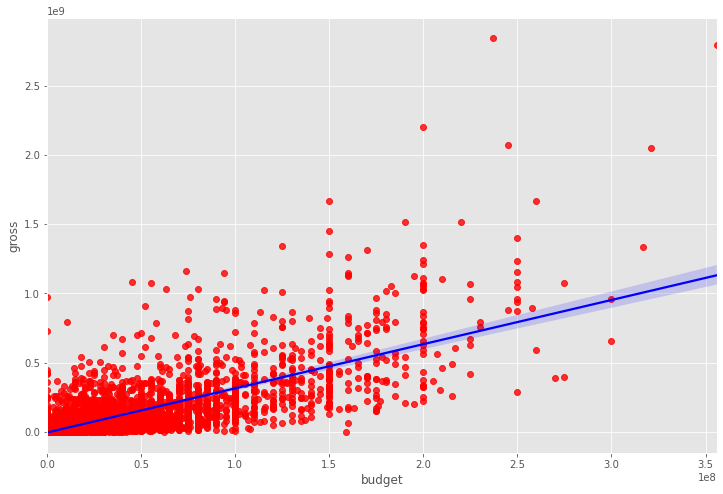

In [19]:
# plot budget vs gross using seaborn
sns.regplot(x='budget',y='gross',data=df, scatter_kws={'color':'red'},line_kws={'color':'blue'})


In [21]:
df.corr(method='pearson') #pearson#kendall#spearman

year     score     votes    budget     gross   runtime
year     1.000000  0.092616  0.222427  0.309212  0.261900  0.116358
score    0.092616  1.000000  0.407101  0.056863  0.186012  0.394564
votes    0.222427  0.407101  1.000000  0.486931  0.632870  0.306984
budget   0.309212  0.056863  0.486931  1.000000  0.750157  0.268372
gross    0.261900  0.186012  0.632870  0.750157  1.000000  0.244339
runtime  0.116358  0.394564  0.306984  0.268372  0.244339  1.000000

<AxesSubplot:>

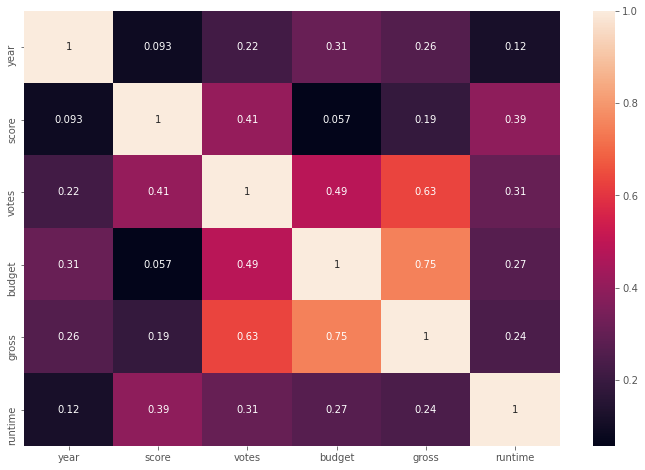

In [22]:
#high correlation btw budget and gross
correlation_matrix=df.corr(method='pearson') #pearson#kendall#spearman
sns.heatmap(correlation_matrix, annot=True)

In [23]:
#looking at company

df_numerized=df

In [25]:
for col_num in df_numerized.columns:
    if(df_numerized[col_num].dtype=='object'):
        df_numerized[col_num]=df_numerized[col_num].astype('category')
        df_numerized[col_num]=df_numerized[col_num].cat.codes

In [39]:
df_numerized.head()

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       6      0  2009       697    7.8  1100000.0      1155    1779   
7445   535       6      0  2019       184    8.4   903000.0       162     744   
3045  6896       6      6  1997       705    7.8  1100000.0      1155    1779   
6663  5144       6      0  2015       699    7.8   876000.0      1125    2551   
7244   536       6      0  2018       193    8.4   897000.0       162     744   

      star  country     budget       gross  company  runtime  yearcorrect  
5445  2335       56  237000000  2847246203     2254    162.0           11  
7445  2242       56  356000000  2797501328     1607    181.0            9  
3045  1596       56  200000000  2201647264     2254    194.0           11  
6663   525       56  245000000  2069521700     1541    138.0           11  
7244  2242       56  321000000  2048359754     1607    149.0            9

In [27]:
df_numerized.dtypes

name           category
rating             int8
genre              int8
year              int64
released          int16
score           float64
votes           float64
director          int16
writer            int16
star              int16
country            int8
budget            int64
gross             int64
company           int16
runtime         float64
yearcorrect        int8
dtype: object

In [30]:
df_numerized['name']=df_numerized['name'].astype('category')
df_numerized['name']=df_numerized['name'].cat.codes

In [40]:
df_numerized.head()

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       6      0  2009       697    7.8  1100000.0      1155    1779   
7445   535       6      0  2019       184    8.4   903000.0       162     744   
3045  6896       6      6  1997       705    7.8  1100000.0      1155    1779   
6663  5144       6      0  2015       699    7.8   876000.0      1125    2551   
7244   536       6      0  2018       193    8.4   897000.0       162     744   

      star  country     budget       gross  company  runtime  yearcorrect  
5445  2335       56  237000000  2847246203     2254    162.0           11  
7445  2242       56  356000000  2797501328     1607    181.0            9  
3045  1596       56  200000000  2201647264     2254    194.0           11  
6663   525       56  245000000  2069521700     1541    138.0           11  
7244  2242       56  321000000  2048359754     1607    149.0            9

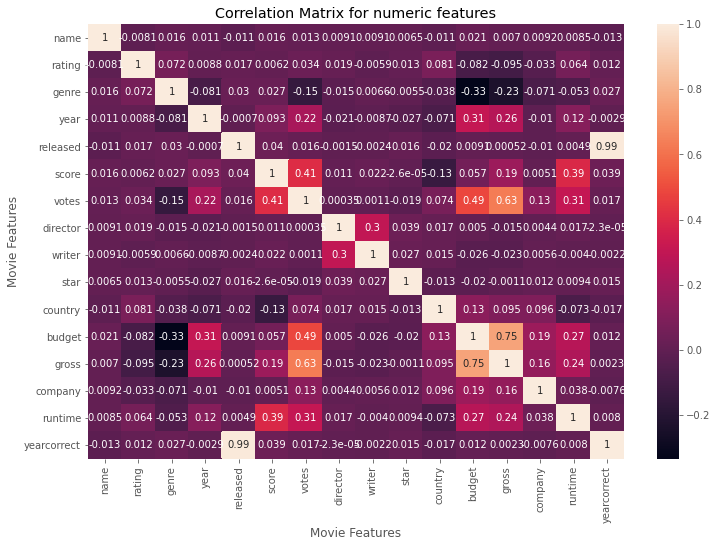

In [32]:
correlation_matrix=df.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [33]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name         1.000000 -0.008069  0.016355  0.011453 -0.011311  0.016377   
rating      -0.008069  1.000000  0.072423  0.008779  0.016613  0.006192   
genre        0.016355  0.072423  1.000000 -0.081261  0.029822  0.027384   
year         0.011453  0.008779 -0.081261  1.000000 -0.000695  0.092616   
released    -0.011311  0.016613  0.029822 -0.000695  1.000000  0.039814   
score        0.016377  0.006192  0.027384  0.092616  0.039814  1.000000   
votes        0.013038  0.033743 -0.145296  0.222427  0.015878  0.407101   
director     0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.010568   
writer       0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.022098   
star         0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.000026   
country     -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133346   
budget       0.020548 -0.081939 -0.334021  0.309212  0.009145  0.056863   
gross        0.006989 -0.095450 -0.234297  0.261900  0.000519  0.186012   
company      0.009211 -0.032943 -0.071067 -0.010431 -0.010474  0.005081   
runtime      0.008483  0.064133 -0.052914  0.116358  0.004852  0.394564   
yearcorrect -0.013132  0.012429  0.027305 -0.002885  0.994590  0.038923   

                votes  director    writer      star   country    budget  \
name         0.013038  0.009079  0.009081  0.006472 -0.010737  0.020548   
rating       0.033743  0.019483 -0.005921  0.013405  0.081244 -0.081939   
genre       -0.145296 -0.015258  0.006567 -0.005477 -0.037615 -0.334021   
year         0.222427 -0.020795 -0.008656 -0.027242 -0.070938  0.309212   
released     0.015878 -0.001478 -0.002404  0.015777 -0.020427  0.009145   
score        0.407101  0.010568  0.022098 -0.000026 -0.133346  0.056863   
votes        1.000000  0.000349  0.001127 -0.019146  0.073525  0.486931   
director     0.000349  1.000000  0.299067  0.039234  0.017490  0.004976   
writer       0.001127  0.299067  1.000000  0.027245  0.015343 -0.025911   
star        -0.019146  0.039234  0.027245  1.000000 -0.012998 -0.019952   
country      0.073525  0.017490  0.015343 -0.012998  1.000000  0.131720   
budget       0.486931  0.004976 -0.025911 -0.019952  0.131720  1.000000   
gross        0.632870 -0.014916 -0.022997 -0.001129  0.095325  0.750157   
company      0.133457  0.004404  0.005646  0.012442  0.095548  0.186474   
runtime      0.306984  0.017062 -0.004036  0.009418 -0.073319  0.268372   
yearcorrect  0.016978 -0.000023 -0.002235  0.015330 -0.017117  0.011545   

                gross   company   runtime  yearcorrect  
name         0.006989  0.009211  0.008483    -0.013132  
rating      -0.095450 -0.032943  0.064133     0.012429  
genre       -0.234297 -0.071067 -0.052914     0.027305  
year         0.261900 -0.010431  0.116358    -0.002885  
released     0.000519 -0.010474  0.004852     0.994590  
score        0.186012  0.005081  0.394564     0.038923  
votes        0.632870  0.133457  0.306984     0.016978  
director    -0.014916  0.004404  0.017062    -0.000023  
writer      -0.022997  0.005646 -0.004036    -0.002235  
star        -0.001129  0.012442  0.009418     0.015330  
country      0.095325  0.095548 -0.073319    -0.017117  
budget       0.750157  0.186474  0.268372     0.011545  
gross        1.000000  0.156745  0.244339     0.002322  
company      0.156745  1.000000  0.037537    -0.007622  
runtime      0.244339  0.037537  1.000000     0.007999  
yearcorrect  0.002322 -0.007622  0.007999     1.000000

In [35]:
corr_matrix=df_numerized.corr()
corr_pairs=corr_matrix.unstack()
corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.016377
             votes          0.013038
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.006989
             company        0.009211
             runtime        0.008483
             yearcorrect   -0.013132
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score          0.006192
             votes          0.033743
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [36]:
sorted=corr_pairs.sort_values()
sorted

budget       genre         -0.334021
genre        budget        -0.334021
gross        genre         -0.234297
genre        gross         -0.234297
votes        genre         -0.145296
genre        votes         -0.145296
country      score         -0.133346
score        country       -0.133346
rating       gross         -0.095450
gross        rating        -0.095450
budget       rating        -0.081939
rating       budget        -0.081939
year         genre         -0.081261
genre        year          -0.081261
runtime      country       -0.073319
country      runtime       -0.073319
company      genre         -0.071067
genre        company       -0.071067
country      year          -0.070938
year         country       -0.070938
genre        runtime       -0.052914
runtime      genre         -0.052914
genre        country       -0.037615
country      genre         -0.037615
company      rating        -0.032943
rating       company       -0.032943
star         year          -0.027242
y

In [38]:
high_corr=sorted[(sorted)>0.5]
high_corr

gross        votes          0.632870
votes        gross          0.632870
budget       gross          0.750157
gross        budget         0.750157
yearcorrect  released       0.994590
released     yearcorrect    0.994590
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
#votes and gross have high correlation